# Assignment 2
# Submitted by: Ursula Das (21032821) and Aman Kumar (20954277)

##Import Libraries and Load Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.naive_bayes import MultinomialNB, ComplementNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


import random

import warnings
warnings.filterwarnings("ignore")

random.seed(69)
%matplotlib inline

# Abalone Dataset

##Import Libraries and Load Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from mpl_toolkits.mplot3d import Axes3D
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler

from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


import random

import warnings
warnings.filterwarnings("ignore")

random.seed(69)
%matplotlib inline

In [ ]:
#Adding header row

#/content/abalone.csv
data=pd.read_csv('abalone.csv',names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])


In [ ]:
data['Rings'].nunique()

28

## Preprocessing the dataset

## Normalizing the data using z-score normalization

In [ ]:
continuous_features = ["Length",	"Diameter",	"Height",	"Whole weight",	"Shucked weight",	"Viscera weight",	"Shell weight"]

#Z-Score Normalization
scaler = StandardScaler()
data[continuous_features] = scaler.fit_transform(data[continuous_features])

#Scaled Continuous Features Dataframe
scaled_df=pd.DataFrame(data[continuous_features], columns = ["Length",	"Diameter",	"Height",	"Whole weight",	"Shucked weight",	"Viscera weight",	"Shell weight"])
scaled_df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757
...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739


## Abalone- One Hot Encoding

In [ ]:
#Adding categorical column to the scaled cont feature dataframe
scaled_df = scaled_df.join(data['Sex'])

#One Hot-Encoding for categorical data: Sex is the only categorical variable so processing it
scaled_df = pd.get_dummies(scaled_df,columns = ["Sex"])

#Drop one dummy column to avoid dummy variable trap
scaled_df.drop(['Sex_I'], axis='columns',inplace = True)

#Scaled dataframe of continuous features and categorical encoded column
scaled_df


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_M
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,0,1
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,0,1
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,1,0
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0,1
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,0,0
...,...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,1,0
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,0,1
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,0,1
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,1,0


In [ ]:
best_accuracies = pd.DataFrame(columns=['model', 'setting', "dataset", "Accuracy"])

## **Applying PCA**

In [ ]:
#PCA classifier model
pca_abalone=PCA()

#Fitting model to the scaled_df dataframe
abalone_pca_transformed=pca_abalone.fit_transform(scaled_df)

#PCA transformed dataframe
pca_df = pd.DataFrame(abalone_pca_transformed, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])

pca_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-1.738712,-0.725206,-0.225201,-0.361336,-0.119097,-0.267925,0.203037,0.090687,-0.015820
1,-3.340773,-0.677251,0.063814,0.216668,-0.070177,-0.398565,0.221123,-0.013807,0.007377
2,-0.458256,0.795038,0.089827,-0.422672,-0.098959,-0.245021,0.120271,0.030466,-0.041380
3,-1.492385,-0.606898,0.361438,-0.033853,-0.043474,-0.288273,0.114844,0.173342,0.003497
4,-3.679499,-0.000607,-0.285711,0.282773,0.008283,0.176007,-0.051347,0.065308,-0.028660
...,...,...,...,...,...,...,...,...,...
4172,0.821754,0.806665,0.221517,-0.042793,0.177449,-0.347752,-0.210554,0.060392,0.049497
4173,0.729464,-0.727863,-0.169228,-0.321229,0.074559,-0.151052,0.029449,-0.150960,0.000291
4174,2.173445,-0.532186,0.864076,0.371907,0.350251,-0.146115,-0.178670,0.040866,0.024168
4175,1.665348,0.647163,-0.453070,-0.281241,0.254666,-0.160093,0.036712,-0.032814,0.098064


## PCA Plots

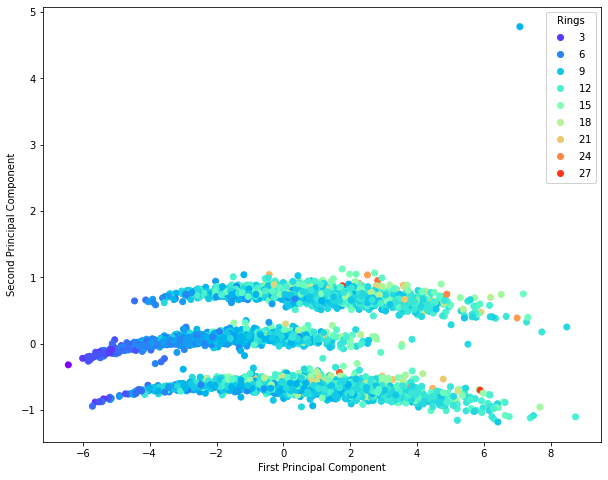

In [ ]:


fig, ax = plt.subplots(1,1,figsize=(10,8))
scatter = ax.scatter(abalone_pca_transformed[:,0],abalone_pca_transformed[:,1],c=data.loc[:,'Rings'],cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(num=7),
                    loc="best", title="Rings")
ax.add_artist(legend1)
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
plt.show()



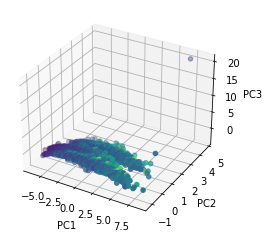

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(abalone_pca_transformed[:, 0], abalone_pca_transformed[:, 1], abalone_pca_transformed[:, 2],c=data.loc[:,'Rings'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

**Check Variance of Each Principal Component**


In [ ]:
explained_variance= (pca_abalone.explained_variance_ratio_)*100
print(explained_variance)

[85.82761024  4.59524955  3.7144413   2.24451297  1.53076454  1.0132335
  0.81578542  0.1691356   0.08926688]


In [ ]:
explained_variance=np.insert(explained_variance,0,0)
print(explained_variance)
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))
print(cumulative_variance)

[ 0.         85.82761024  4.59524955  3.7144413   2.24451297  1.53076454
  1.0132335   0.81578542  0.1691356   0.08926688]
[  0.     85.828  90.423  94.137  96.382  97.913  98.926  99.742  99.911
 100.   ]


In [ ]:
pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3','PC4','PC5','PC6','PC7','PC8','PC9'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,85.827610,85.828
2,PC2,4.595250,90.423
3,PC3,3.714441,94.137
4,PC4,2.244513,96.382
5,PC5,1.530765,97.913
6,PC6,1.013234,98.926
7,PC7,0.815785,99.742
8,PC8,0.169136,99.911
9,PC9,0.089267,100.000


Scree Plot

In [ ]:
fig = px.bar(df_explained_variance, 
             x='PC', y='Explained Variance',
             text='Explained Variance',
             width=800)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

In [ ]:
#Cumulative Variance

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        text=df_explained_variance['Cumulative Variance'].apply(lambda x: f"{x:.2f}"),
        textposition='bottom center',
        mode='lines+markers+text',
        marker=dict(size=15, color="LightSeaGreen"),
      
    ))

fig.update_traces(textposition='bottom center', textfont=dict(color='black'))

fig.update_layout(
    xaxis_title="Principal Component",
    yaxis_title="Cumulative Variance"
)


fig.show()

## One-hot encoding the categorical variables

In [ ]:

X_pca=pca_df

Y_pca = data["Rings"]

X_pca


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-1.738712,-0.725206,-0.225201,-0.361336,-0.119097,-0.267925,0.203037,0.090687,-0.015820
1,-3.340773,-0.677251,0.063814,0.216668,-0.070177,-0.398565,0.221123,-0.013807,0.007377
2,-0.458256,0.795038,0.089827,-0.422672,-0.098959,-0.245021,0.120271,0.030466,-0.041380
3,-1.492385,-0.606898,0.361438,-0.033853,-0.043474,-0.288273,0.114844,0.173342,0.003497
4,-3.679499,-0.000607,-0.285711,0.282773,0.008283,0.176007,-0.051347,0.065308,-0.028660
...,...,...,...,...,...,...,...,...,...
4172,0.821754,0.806665,0.221517,-0.042793,0.177449,-0.347752,-0.210554,0.060392,0.049497
4173,0.729464,-0.727863,-0.169228,-0.321229,0.074559,-0.151052,0.029449,-0.150960,0.000291
4174,2.173445,-0.532186,0.864076,0.371907,0.350251,-0.146115,-0.178670,0.040866,0.024168
4175,1.665348,0.647163,-0.453070,-0.281241,0.254666,-0.160093,0.036712,-0.032814,0.098064


##Testing KNN accuracy for PCA on Abalone

In [ ]:
test_accuracies = []
num_components = []
for n_components in range(2,pca_df.shape[1]+1):
  X_train, X_test, Y_train, Y_test = train_test_split(X_pca.iloc[:,0:n_components], Y_pca, test_size=0.2)
  
  classifier = KNeighborsClassifier(n_neighbors = 84, weights = 'distance')
  classifier = classifier.fit(X_train, Y_train)
  test_score = classifier.score(X_test, Y_test)
  test_accuracies.append(test_score*100)
  num_components.append(n_components)
test_accuracies

[24.04306220095694,
 24.52153110047847,
 24.2822966507177,
 23.923444976076556,
 26.435406698564595,
 28.11004784688995,
 25.358851674641148,
 26.913875598086122]

In [ ]:
print("Best test accuracy: ", max(test_accuracies))
print("Num of components: ", num_components[np.argmax(test_accuracies)])

Best test accuracy:  28.11004784688995
Num of components:  7


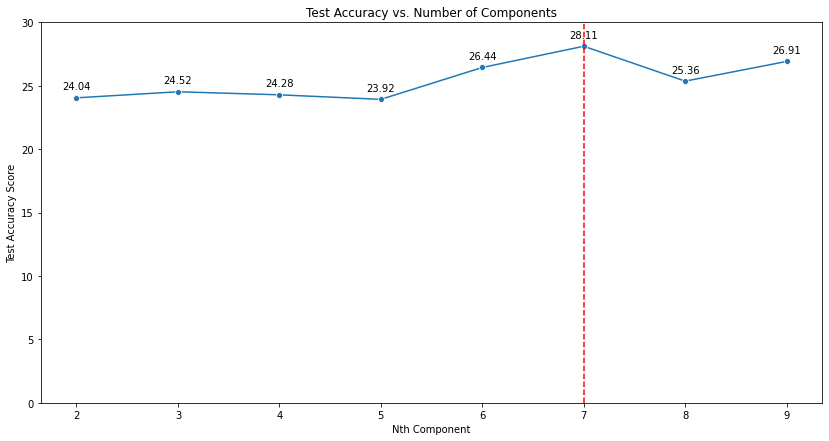

In [ ]:
plt.figure(figsize=(14,7))
ax = sns.lineplot(range(2, len(test_accuracies)+2),test_accuracies,markers=True, marker='o')
ax.set_xlabel("Nth Component")
ax.set_ylabel("Test Accuracy Score")
ax.set_title("Test Accuracy vs. Number of Components")


# Find the index of the maximum value
max_index = np.argmax(test_accuracies)

# Plot a vertical line at the corresponding x-value
ax.axvline(max_index+2, color='r', linestyle='--')


# # Display the values on the plot
for i, value in enumerate(test_accuracies):
    ax.text(i+2, value+0.5, f"{value:.2f}", horizontalalignment='center', verticalalignment='bottom')

plt.ylim(0, 30)
plt.show()




## Abalone LDA

In [ ]:

x_lda=scaled_df
y_lda = data['Rings']
lda_abalone = LinearDiscriminantAnalysis()
abalone_lda_transformed = lda_abalone.fit_transform(x_lda, y_lda)

columns=[]
for n_lda_comp in range(1,10):
  columns.append('LD'+str(n_lda_comp))
lda_df = pd.DataFrame(abalone_lda_transformed, columns = columns)
lda_df

,LD1,LD2,LD3,LD4,LD5,LD6,LD7,LD8,LD9
0,-0.407959,0.230925,-0.125718,0.184760,-0.619881,0.893590,1.264862,1.161009,1.066904
1,-1.837047,-0.361837,-0.539940,0.130769,-0.870445,1.668998,0.444734,-0.046844,1.032626
2,0.960864,0.202509,0.677704,0.514244,-0.205133,1.077944,-0.024877,1.006153,-1.085499
3,-0.274973,-0.096006,-0.167865,0.646905,-1.288331,0.646349,1.691374,-0.016645,0.475424
4,-2.925191,-0.523997,0.269784,0.293488,0.160648,-0.453092,0.396495,0.173047,-0.196404
...,...,...,...,...,...,...,...,...,...
4172,1.021066,0.575918,-0.472871,0.834160,-1.268302,0.017671,-0.605068,-0.006799,-1.421103
4173,0.683456,0.905941,-0.247643,-0.280670,0.165901,0.568717,-0.700935,0.286319,1.660679
4174,1.163419,0.415442,-0.679722,0.903044,-0.842689,-0.326292,0.289280,-2.063852,0.464820
4175,0.947552,1.470735,-1.041671,-0.602505,-0.199501,0.093729,-0.758409,0.756101,-1.036738


In [ ]:
X_lda = lda_df


Y_lda = data["Rings"]

X_lda

,LD1,LD2,LD3,LD4,LD5,LD6,LD7,LD8,LD9
0,-0.407959,0.230925,-0.125718,0.184760,-0.619881,0.893590,1.264862,1.161009,1.066904
1,-1.837047,-0.361837,-0.539940,0.130769,-0.870445,1.668998,0.444734,-0.046844,1.032626
2,0.960864,0.202509,0.677704,0.514244,-0.205133,1.077944,-0.024877,1.006153,-1.085499
3,-0.274973,-0.096006,-0.167865,0.646905,-1.288331,0.646349,1.691374,-0.016645,0.475424
4,-2.925191,-0.523997,0.269784,0.293488,0.160648,-0.453092,0.396495,0.173047,-0.196404
...,...,...,...,...,...,...,...,...,...
4172,1.021066,0.575918,-0.472871,0.834160,-1.268302,0.017671,-0.605068,-0.006799,-1.421103
4173,0.683456,0.905941,-0.247643,-0.280670,0.165901,0.568717,-0.700935,0.286319,1.660679
4174,1.163419,0.415442,-0.679722,0.903044,-0.842689,-0.326292,0.289280,-2.063852,0.464820
4175,0.947552,1.470735,-1.041671,-0.602505,-0.199501,0.093729,-0.758409,0.756101,-1.036738


###LDA Plots

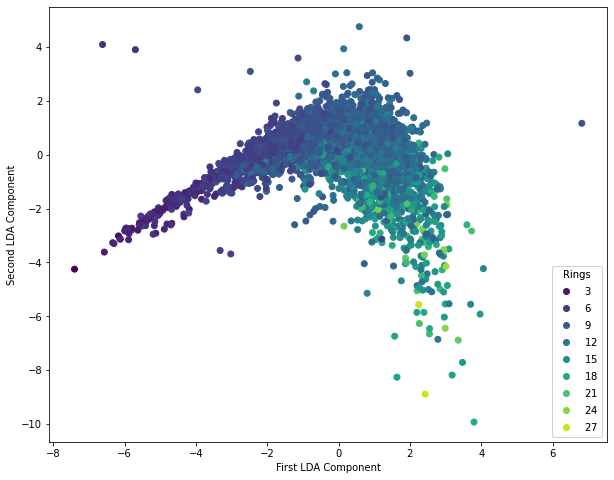

In [ ]:
# plt.figure(figsize=(8,6))
# plt.scatter(abalone_lda_transformed[:,0],abalone_lda_transformed[:,1],c=data.loc[:,'Rings'])
# plt.xlabel('First LDA Component')
# plt.ylabel('Second LDA Component')

fig, ax = plt.subplots(1,1,figsize=(10,8))
# plt.figure(figsize=(8,6))
scatter = ax.scatter(abalone_lda_transformed[:,0],abalone_lda_transformed[:,1],c = data.loc[:,'Rings'])
legend1 = ax.legend(*scatter.legend_elements(num=7),
                    loc="best", title="Rings")
ax.add_artist(legend1)
ax.set_xlabel('First LDA Component')
ax.set_ylabel('Second LDA Component')
# plt.legend(title='Quality', loc='best', labels= wine_data['quality'].unique())
plt.show()

In [ ]:
explained_variance_lda= (lda_abalone.explained_variance_ratio_)*100
print(explained_variance_lda)

[71.8860503  21.33551611  4.59812052  0.87791172  0.58335783  0.35877966
  0.19304831  0.09529154  0.07192401]


In [ ]:
explained_variance_lda=np.insert(explained_variance_lda,0,0)
print(explained_variance_lda)
cumulative_variance_lda = np.cumsum(np.round(explained_variance_lda, decimals=3))
print(cumulative_variance_lda)

[ 0.         71.8860503  21.33551611  4.59812052  0.87791172  0.58335783
  0.35877966  0.19304831  0.09529154  0.07192401]
[  0.     71.886  93.222  97.82   98.698  99.281  99.64   99.833  99.928
 100.   ]


In [ ]:
ld_df = pd.DataFrame(['','LD1', 'LD2', 'LD3','LD4','LD5','LD6','LD7','LD8','LD9'], columns=['LDA'])
explained_variance_LDA_df = pd.DataFrame(explained_variance_lda, columns=['Explained Variance'])
cumulative_variance_LDA_df = pd.DataFrame(cumulative_variance_lda, columns=['Cumulative Variance'])
df_explained_variance_lda = pd.concat([ld_df, explained_variance_LDA_df, cumulative_variance_LDA_df], axis=1)
df_explained_variance_lda

,LDA,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,LD1,71.886050,71.886
2,LD2,21.335516,93.222
3,LD3,4.598121,97.820
4,LD4,0.877912,98.698
5,LD5,0.583358,99.281
6,LD6,0.358780,99.640
7,LD7,0.193048,99.833
8,LD8,0.095292,99.928
9,LD9,0.071924,100.000


In [ ]:
fig = px.bar(df_explained_variance_lda, 
             x='LDA', y='Explained Variance',
             text='Explained Variance',
             width=800)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

In [ ]:
#Cumulative Variance

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_explained_variance_lda['LDA'],
        y=df_explained_variance_lda['Cumulative Variance'],
        text=df_explained_variance_lda['Cumulative Variance'].apply(lambda x: f"{x:.2f}"),
        textposition='bottom center',
        mode='lines+markers+text',
        marker=dict(size=15, color="LightSeaGreen"),
      
    ))

fig.update_traces(textposition='bottom center', textfont=dict(color='black'))

fig.update_layout(
    xaxis_title="LD Component",
    yaxis_title="Cumulative Variance"
)


fig.show()

###Testing KNN accuracies on abalone with LDA

In [ ]:
test_accuracies = []
num_components = []
for n_components in range(2,lda_df.shape[1]+1):
  
  X_train, X_test, Y_train, Y_test = train_test_split(X_lda.iloc[:,0:n_components], Y_lda, test_size=0.2, random_state=69)
 
  classifier = KNeighborsClassifier(n_neighbors = 84, weights = 'distance')
  classifier = classifier.fit(X_train, Y_train)
  test_score = classifier.score(X_test, Y_test)
  test_accuracies.append(test_score*100)
  num_components.append(n_components)
test_accuracies

[23.923444976076556,
 27.033492822966508,
 27.51196172248804,
 27.15311004784689,
 27.631578947368425,
 25.478468899521534,
 26.435406698564595,
 25.717703349282296]

In [ ]:
print("Best test accuracy: ", max(test_accuracies))
print("Num of components: ", num_components[np.argmax(test_accuracies)])

Best test accuracy:  27.631578947368425
Num of components:  6


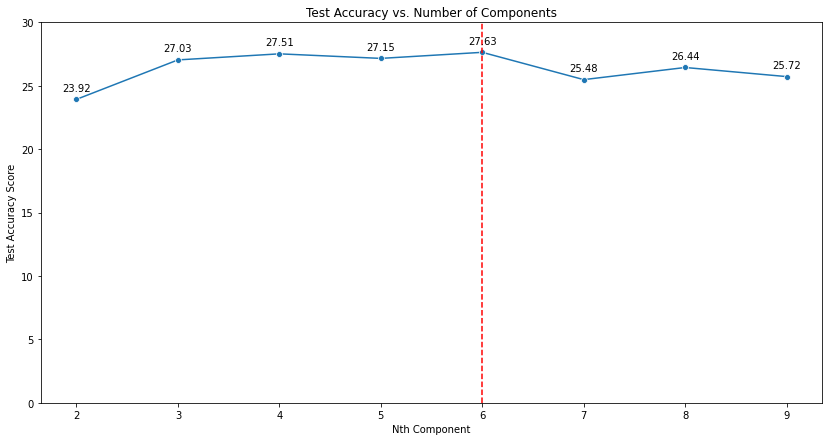

In [ ]:
plt.figure(figsize=(14,7))
ax = sns.lineplot(range(2, len(test_accuracies)+2),test_accuracies,markers=True, marker='o')
ax.set_xlabel("Nth Component")
ax.set_ylabel("Test Accuracy Score")
ax.set_title("Test Accuracy vs. Number of Components")


# Find the index of the maximum value
max_index = np.argmax(test_accuracies)

# Plot a vertical line at the corresponding x-value
ax.axvline(max_index+2, color='r', linestyle='--')


# # Display the values on the plot
for i, value in enumerate(test_accuracies):
    ax.text(i+2, value+0.5, f"{value:.2f}", horizontalalignment='center', verticalalignment='bottom')

plt.ylim(0, 30)
plt.show()



## t-SNE

In [ ]:
tsne = TSNE()
tsne_transformed = tsne.fit_transform(scaled_df)




<AxesSubplot:>

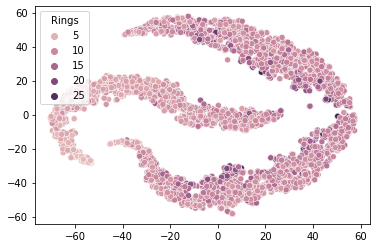

In [ ]:
sns.scatterplot(data = scaled_df.join(data['Rings']), x = tsne_transformed[:,0], y = tsne_transformed[:,1], hue = 'Rings')

## 3 Abalone Datasets


In [ ]:

# X_raw=data[continuous_features].join(data['Sex'])

# #One Hot-Encoding for categorical data: Sex is the only categorical variable so processing it
# X_raw = pd.get_dummies(X_raw,columns = ["Sex"])

# #Drop one dummy column to avoid dummy variable trap
# X_raw.drop(['Sex_I'], axis='columns',inplace = True)


abalone_raw = scaled_df
abalone_raw

#X1_pca=X_pca.iloc[:,0:7]
abalone_pca = X_pca.iloc[:,0:9]

#X1_lda=X_lda.iloc[:,0:4]
abalone_lda = X_lda.iloc[:,0:9]

Y_all=data['Rings']

display(abalone_raw)
display(abalone_pca)
display(abalone_lda)


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_M
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,0,1
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,0,1
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,1,0
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0,1
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,0,0
...,...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,1,0
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,0,1
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,0,1
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,1,0


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-1.738712,-0.725206,-0.225201,-0.361336,-0.119097,-0.267925,0.203037,0.090687,-0.015820
1,-3.340773,-0.677251,0.063814,0.216668,-0.070177,-0.398565,0.221123,-0.013807,0.007377
2,-0.458256,0.795038,0.089827,-0.422672,-0.098959,-0.245021,0.120271,0.030466,-0.041380
3,-1.492385,-0.606898,0.361438,-0.033853,-0.043474,-0.288273,0.114844,0.173342,0.003497
4,-3.679499,-0.000607,-0.285711,0.282773,0.008283,0.176007,-0.051347,0.065308,-0.028660
...,...,...,...,...,...,...,...,...,...
4172,0.821754,0.806665,0.221517,-0.042793,0.177449,-0.347752,-0.210554,0.060392,0.049497
4173,0.729464,-0.727863,-0.169228,-0.321229,0.074559,-0.151052,0.029449,-0.150960,0.000291
4174,2.173445,-0.532186,0.864076,0.371907,0.350251,-0.146115,-0.178670,0.040866,0.024168
4175,1.665348,0.647163,-0.453070,-0.281241,0.254666,-0.160093,0.036712,-0.032814,0.098064


,LD1,LD2,LD3,LD4,LD5,LD6,LD7,LD8,LD9
0,-0.407959,0.230925,-0.125718,0.184760,-0.619881,0.893590,1.264862,1.161009,1.066904
1,-1.837047,-0.361837,-0.539940,0.130769,-0.870445,1.668998,0.444734,-0.046844,1.032626
2,0.960864,0.202509,0.677704,0.514244,-0.205133,1.077944,-0.024877,1.006153,-1.085499
3,-0.274973,-0.096006,-0.167865,0.646905,-1.288331,0.646349,1.691374,-0.016645,0.475424
4,-2.925191,-0.523997,0.269784,0.293488,0.160648,-0.453092,0.396495,0.173047,-0.196404
...,...,...,...,...,...,...,...,...,...
4172,1.021066,0.575918,-0.472871,0.834160,-1.268302,0.017671,-0.605068,-0.006799,-1.421103
4173,0.683456,0.905941,-0.247643,-0.280670,0.165901,0.568717,-0.700935,0.286319,1.660679
4174,1.163419,0.415442,-0.679722,0.903044,-0.842689,-0.326292,0.289280,-2.063852,0.464820
4175,0.947552,1.470735,-1.041671,-0.602505,-0.199501,0.093729,-0.758409,0.756101,-1.036738


## KNN classifier on Abalone dataset

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(abalone_raw, Y_all, test_size=0.2, random_state=69)
classifier_knn_raw = KNeighborsClassifier(n_neighbors = 84, weights = 'distance')
classifier_knn_raw = classifier_knn_raw.fit(X_train, Y_train)
knn_raw_test_accuracy = classifier_knn_raw.score(X_test, Y_test)*100
#print("Test accuracy of KNN on raw dataset: ", raw_test_accuracy)
print("Best performance with KNN on abalone-raw dataset = {}, with parameters = {}".format(knn_raw_test_accuracy, "n_neighbors = 84 (from prev assgn)"))
performance = {'model': 'KNN', 'setting': "n_neighbors = 84 (from prev assgn)", 'dataset':'abalone-raw', 'Accuracy':knn_raw_test_accuracy}
best_accuracies = best_accuracies.append(performance, ignore_index=True)


Best performance with KNN on abalone-raw dataset = 25.11961722488038, with parameters = n_neighbors = 84 (from prev assgn)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(abalone_pca, Y_all, test_size=0.2, random_state=69)
classifier_knn_pca = KNeighborsClassifier(n_neighbors = 84, weights = 'distance')
classifier_knn_pca = classifier_knn_pca.fit(X_train, Y_train)
knn_pca_test_accuracy = classifier_knn_pca.score(X_test, Y_test)*100
#print("Test accuracy of KNN on raw dataset: ", raw_test_accuracy)
print("Best performance with KNN on abalone-pca dataset = {}, with parameters = {}".format(knn_pca_test_accuracy, "n_neighbors = 84 (from prev assgn)"))
performance = {'model': 'KNN', 'setting': "n_neighbors = 84 (from prev assgn)", 'dataset':'abalone-pca', 'Accuracy':knn_pca_test_accuracy}
best_accuracies = best_accuracies.append(performance, ignore_index=True)

Best performance with KNN on abalone-pca dataset = 25.11961722488038, with parameters = n_neighbors = 84 (from prev assgn)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(abalone_lda, Y_all, test_size=0.2, random_state=69)
classifier = KNeighborsClassifier(n_neighbors = 84, weights = 'distance')
classifier = classifier.fit(X_train, Y_train)
raw_test_accuracy = classifier.score(X_test, Y_test)*100
#print("Test accuracy of KNN on raw dataset: ", raw_test_accuracy)
print("Best performance with KNN on abalone-lda dataset = {}, with parameters = {}".format(raw_test_accuracy, "n_neighbors = 84 (from prev assgn)"))
performance = {'model': 'KNN', 'setting': "n_neighbors = 84 (from prev assgn)", 'dataset':'abalone-lda', 'Accuracy':raw_test_accuracy}
best_accuracies = best_accuracies.append(performance, ignore_index=True)

Best performance with KNN on abalone-lda dataset = 25.717703349282296, with parameters = n_neighbors = 84 (from prev assgn)


##Gaussian Naive Bayes


In [ ]:

gnb_raw_classifier = GaussianNB()
gnb_raw_cross_val_scores = cross_val_score(estimator = gnb_raw_classifier, X = abalone_raw, y = Y_all, cv = 5)
gnb_raw_avg_score = np.mean(gnb_raw_cross_val_scores)*100
print("Average Cross-validation score on raw dataset: ", gnb_raw_avg_score)
gnb_raw_performance = {'model': 'Naive Bayes', 'setting': "Gaussian", 'dataset':'abalone-raw', 'Accuracy': gnb_raw_avg_score}
best_accuracies = best_accuracies.append(gnb_raw_performance, ignore_index=True)

Average Cross-validation score on raw dataset:  22.07460676732659


In [ ]:

gnb_pca_classifier = GaussianNB()
gnb_pca_cross_val_scores = cross_val_score(estimator = gnb_pca_classifier, X = abalone_pca, y = Y_all, cv = 5)
gnb_pca_avg_score = np.mean(gnb_pca_cross_val_scores)*100
print("Average Cross-validation score on pca dataset: ", gnb_pca_avg_score)
gnb_pca_performance = {'model': 'Naive Bayes', 'setting': "Gaussian", 'dataset':'abalone-pca', 'Accuracy': gnb_pca_avg_score}
best_accuracies = best_accuracies.append(gnb_pca_performance, ignore_index=True)

Average Cross-validation score on pca dataset:  22.16995673724322


In [ ]:

gnb_lda_classifier = GaussianNB()
gnb_lda_cross_val_scores = cross_val_score(estimator = gnb_lda_classifier, X = abalone_lda, y = Y_all, cv = 5)
gnb_lda_avg_score = np.mean(gnb_lda_cross_val_scores)*100
print("Average Cross-validation score on lda dataset: ", gnb_lda_avg_score)
gnb_lda_performance = {'model': 'Naive Bayes', 'setting': "Gaussian", 'dataset':'abalone-lda', 'Accuracy': gnb_lda_avg_score}
best_accuracies = best_accuracies.append(gnb_lda_performance, ignore_index=True)

Average Cross-validation score on lda dataset:  23.318454001088732


## Multinomial Naive Bayes on Abalone

In [ ]:
nb_continuous_features = ["Length",	"Diameter",	"Height",	"Whole weight",	"Shucked weight",	"Viscera weight",	"Shell weight"]
nb_data=data[nb_continuous_features]
                                          
#minmax-Score Normalization
minmax_scaler = MinMaxScaler()
nb_data= minmax_scaler.fit_transform(nb_data)


#Scaled Continuous Features Dataframe
minmax_scaled_df=pd.DataFrame(nb_data, columns = ["Length",	"Diameter",	"Height",	"Whole weight",	"Shucked weight",	"Viscera weight",	"Shell weight"])

#Adding categorical column to the scaled cont feature dataframe
minmax_scaled_df = minmax_scaled_df.join(data['Sex'])

#One Hot-Encoding for categorical data: Sex is the only categorical variable so processing it
minmax_scaled_df = pd.get_dummies(minmax_scaled_df,columns = ["Sex"])

#Drop one dummy column to avoid dummy variable trap
minmax_scaled_df.drop(['Sex_I'], axis='columns',inplace = True)

mnb_classifier = MultinomialNB()
mnb_cross_val_scores = cross_val_score(estimator = mnb_classifier, X = minmax_scaled_df, y = Y_all, cv = 5)
mnb_avg_score = np.mean(mnb_cross_val_scores)*100
print("Average Cross-validation score on raw dataset: ", mnb_avg_score)
mnb_performance = {'model': 'Naive Bayes', 'setting': "Multinomial", 'dataset':'abalone-raw', 'Accuracy': mnb_avg_score}
best_accuracies = best_accuracies.append(mnb_performance, ignore_index=True)


Average Cross-validation score on raw dataset:  16.662579147924248


In [ ]:
data_nb=pd.read_csv('abalone.csv',names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])
nb_continuous_features_pca = ["Length",	"Diameter",	"Height",	"Whole weight",	"Shucked weight",	"Viscera weight",	"Shell weight"]
nb_data_pca=data_nb[nb_continuous_features_pca].join(data['Sex'])
#One Hot-Encoding for categorical data: Sex is the only categorical variable so processing it
nb_data_pca= pd.get_dummies(nb_data_pca,columns = ["Sex"])
#Drop one dummy column to avoid dummy variable trap
nb_data_pca.drop(['Sex_I'], axis='columns',inplace = True)
nb_data_pca

#PCA classifier model
pca_nb=PCA()

#Fitting model to the scaled_df dataframe
abalone_pca_nb_transformed=pca_nb.fit_transform(nb_data_pca)

#PCA transformed dataframe
pca_df_nb = pd.DataFrame(abalone_pca_nb_transformed, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
minmax_scaler_nb = MinMaxScaler()
pca_df_nb= minmax_scaler.fit_transform(pca_df_nb)
pca_df_nb=pd.DataFrame(pca_df_nb, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
pca_df_nb


mnb_classifier_pca = MultinomialNB()
mnb_cross_val_scores_pca = cross_val_score(estimator = mnb_classifier_pca, X =pca_df_nb, y = Y_all, cv = 5)
mnb_avg_score_pca = np.mean(mnb_cross_val_scores_pca)*100
print("Average Cross-validation score on pca dataset: ", mnb_avg_score_pca)
mnb_performance_pca = {'model': 'Naive Bayes', 'setting': "Multinomial", 'dataset':'abalone-raw', 'Accuracy': mnb_avg_score_pca}
best_accuracies = best_accuracies.append(mnb_performance_pca, ignore_index=True)



                                    

Average Cross-validation score on pca dataset:  16.495086382259405


In [ ]:
data_mnb=pd.read_csv('abalone.csv',names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])
mnb_continuous_features_lda = ["Length",	"Diameter",	"Height",	"Whole weight",	"Shucked weight",	"Viscera weight",	"Shell weight"]
mnb_data_lda=data_mnb[mnb_continuous_features_lda].join(data['Sex'])

#One Hot-Encoding for categorical data: Sex is the only categorical variable so processing it
mnb_data_lda= pd.get_dummies(mnb_data_lda,columns = ["Sex"])

#Drop one dummy column to avoid dummy variable trap
mnb_data_lda.drop(['Sex_I'], axis='columns',inplace = True)
mnb_data_lda

lda_abalone_mnb = LinearDiscriminantAnalysis()
abalone_lda_transformed_mnb = lda_abalone_mnb.fit_transform(mnb_data_lda, data['Rings'])
abalone_lda_transformed_mnb 

columns_mnb=[]
for n_lda_comp_mnb in range(1,10):
  columns_mnb.append('LD'+str(n_lda_comp_mnb))

lda_df_mnb = pd.DataFrame(abalone_lda_transformed_mnb, columns = columns_mnb)
lda_df_mnb

minmax_scaler_mnb = MinMaxScaler()
lda_df_mnb= minmax_scaler.fit_transform(lda_df_mnb)
lda_df_mnb=pd.DataFrame(lda_df_mnb, columns = columns_mnb)
lda_df_mnb



mnb_classifier_lda = MultinomialNB()
mnb_cross_val_scores_lda = cross_val_score(estimator = mnb_classifier_lda, X =lda_df_mnb, y = Y_all, cv = 5)
mnb_avg_score_lda = np.mean(mnb_cross_val_scores_lda)*100
print("Average Cross-validation score on lda dataset: ", mnb_avg_score_lda)
mnb_performance_lda = {'model': 'Naive Bayes', 'setting': "Multinomial", 'dataset':'abalone-lda', 'Accuracy': mnb_avg_score_lda}
best_accuracies = best_accuracies.append(mnb_performance_lda, ignore_index=True)



Average Cross-validation score on lda dataset:  16.495086382259405


## Naive Bayes (Complement) on ABalone

###abalone-raw

In [ ]:
cnb_classifier = ComplementNB()
cnb_cross_val_scores = cross_val_score(estimator = cnb_classifier, X = minmax_scaled_df, y = Y_all, cv = 5)
cnb_avg_score = np.mean(cnb_cross_val_scores)*100
print("Average Cross-validation score on raw dataset: ", cnb_avg_score)
cnb_performance = {'model': 'Naive Bayes', 'setting': "Complement", 'dataset':'abalone-raw', 'Accuracy': cnb_avg_score}
best_accuracies = best_accuracies.append(cnb_performance, ignore_index=True)

Average Cross-validation score on raw dataset:  14.747586167378163


###abalone-pca

In [ ]:
data_cnb_raw=pd.read_csv('abalone.csv',names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])
cnb_raw_continuous_features_pca = ["Length",	"Diameter",	"Height",	"Whole weight",	"Shucked weight",	"Viscera weight",	"Shell weight"]
cnb_raw_data_pca=data_cnb_raw[cnb_raw_continuous_features_pca].join(data['Sex'])

#One Hot-Encoding for categorical data: Sex is the only categorical variable so processing it
cnb_raw_data_pca= pd.get_dummies(cnb_raw_data_pca,columns = ["Sex"])
#Drop one dummy column to avoid dummy variable trap
cnb_raw_data_pca.drop(['Sex_I'], axis='columns',inplace = True)
cnb_raw_data_pca


#PCA classifier model
pca_cnb_raw=PCA()

#Fitting model to the scaled_df dataframe
abalone_pca_cnb_raw_transformed=pca_cnb_raw.fit_transform(cnb_raw_data_pca)

#PCA transformed dataframe
pca_df_cnb_raw = pd.DataFrame(abalone_pca_cnb_raw_transformed, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
minmax_scaler_cnb_raw = MinMaxScaler()
pca_df_cnb_raw= minmax_scaler.fit_transform(pca_df_cnb_raw)
pca_df_cnb_raw=pd.DataFrame(pca_df_cnb_raw, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
pca_df_cnb_raw


cnb_raw_classifier_pca = ComplementNB()
cnb_raw_cross_val_scores_pca = cross_val_score(estimator = cnb_raw_classifier_pca, X =pca_df_cnb_raw, y = Y_all, cv = 5)
cnb_raw_avg_score_pca = np.mean(cnb_raw_cross_val_scores_pca)*100
print("Average Cross-validation score on pca dataset: ",cnb_raw_avg_score_pca)
cnb_raw_performance_pca = {'model': 'Naive Bayes', 'setting': "Multinomial", 'dataset':'abalone-pca', 'Accuracy': cnb_raw_avg_score_pca}
best_accuracies = best_accuracies.append(cnb_raw_performance_pca, ignore_index=True)





Average Cross-validation score on pca dataset:  19.29536143024955


###abalone-lda

In [ ]:
data_cnb_lda=pd.read_csv('abalone.csv',names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])
cnb_continuous_features_lda = ["Length",	"Diameter",	"Height",	"Whole weight",	"Shucked weight",	"Viscera weight",	"Shell weight"]
cnb_data_lda=data_cnb_lda[cnb_continuous_features_lda].join(data['Sex'])

#One Hot-Encoding for categorical data: Sex is the only categorical variable so processing it
cnb_data_lda= pd.get_dummies(cnb_data_lda,columns = ["Sex"])

#Drop one dummy column to avoid dummy variable trap
cnb_data_lda.drop(['Sex_I'], axis='columns',inplace = True)
cnb_data_lda

lda_abalone_cnb = LinearDiscriminantAnalysis()
abalone_lda_transformed_cnb = lda_abalone_mnb.fit_transform(cnb_data_lda, data['Rings'])
abalone_lda_transformed_cnb 

columns_cnb=[]
for n_lda_comp_cnb in range(1,10):
  columns_cnb.append('LD'+str(n_lda_comp_cnb))

lda_df_cnb = pd.DataFrame(abalone_lda_transformed_cnb, columns = columns_cnb)
lda_df_cnb

minmax_scaler_cnb = MinMaxScaler()
lda_df_cnb= minmax_scaler.fit_transform(lda_df_cnb)
lda_df_cnb=pd.DataFrame(lda_df_cnb, columns = columns_cnb)
lda_df_cnb



cnb_classifier_lda = ComplementNB()
cnb_cross_val_scores_lda = cross_val_score(estimator = cnb_classifier_lda, X =lda_df_cnb, y = Y_all, cv = 5)
cnb_avg_score_lda = np.mean(cnb_cross_val_scores_lda)*100
print("Average Cross-validation score on lda dataset: ", cnb_avg_score_lda)
cnb_performance_lda = {'model': 'Naive Bayes', 'setting': "Multinomial", 'dataset':'abalone-lda', 'Accuracy': cnb_avg_score_lda}
best_accuracies = best_accuracies.append(cnb_performance_lda, ignore_index=True)

Average Cross-validation score on lda dataset:  23.006790247256685


## Decision Tree

### abalone-raw

In [ ]:
min_depth = 1
max_depth = 100

dt_raw_parameters = {'max_depth':[i for i in range(min_depth,max_depth)]}
dt_raw_classifier = DecisionTreeClassifier()
dt_raw_clf = GridSearchCV(estimator=dt_raw_classifier, param_grid=dt_raw_parameters, cv=5, verbose=1)
dt_raw_clf.fit(abalone_raw, Y_all)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...]},
             verbose=1)

Text(0, 0.5, 'Mean test score')

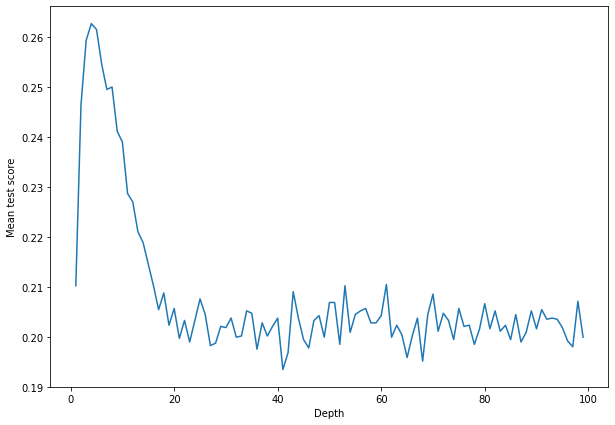

In [ ]:
plt.figure(figsize=(10,7))
arr=dt_raw_clf.cv_results_['mean_test_score']
ax = sns.lineplot(range(min_depth, max_depth),arr)
ax.set_xlabel("Depth")
ax.set_ylabel("Mean test score")

In [ ]:
print("Best performance with Decision Tree on abalone-raw dataset = {}, with parameters = {}".format(dt_raw_clf.best_score_*100, dt_raw_clf.best_params_))

Best performance with Decision Tree on abalone-raw dataset = 26.26310059307223, with parameters = {'max_depth': 4}


In [ ]:
dt_raw_performance = {'model': 'Decision Tree', 'setting': dt_raw_clf.best_params_, 'dataset':'abalone-raw', 'Accuracy': dt_raw_clf.best_score_*100}
best_accuracies = best_accuracies.append(dt_raw_performance, ignore_index=True)

In [ ]:
best_decision_tree = dt_raw_clf.best_estimator_

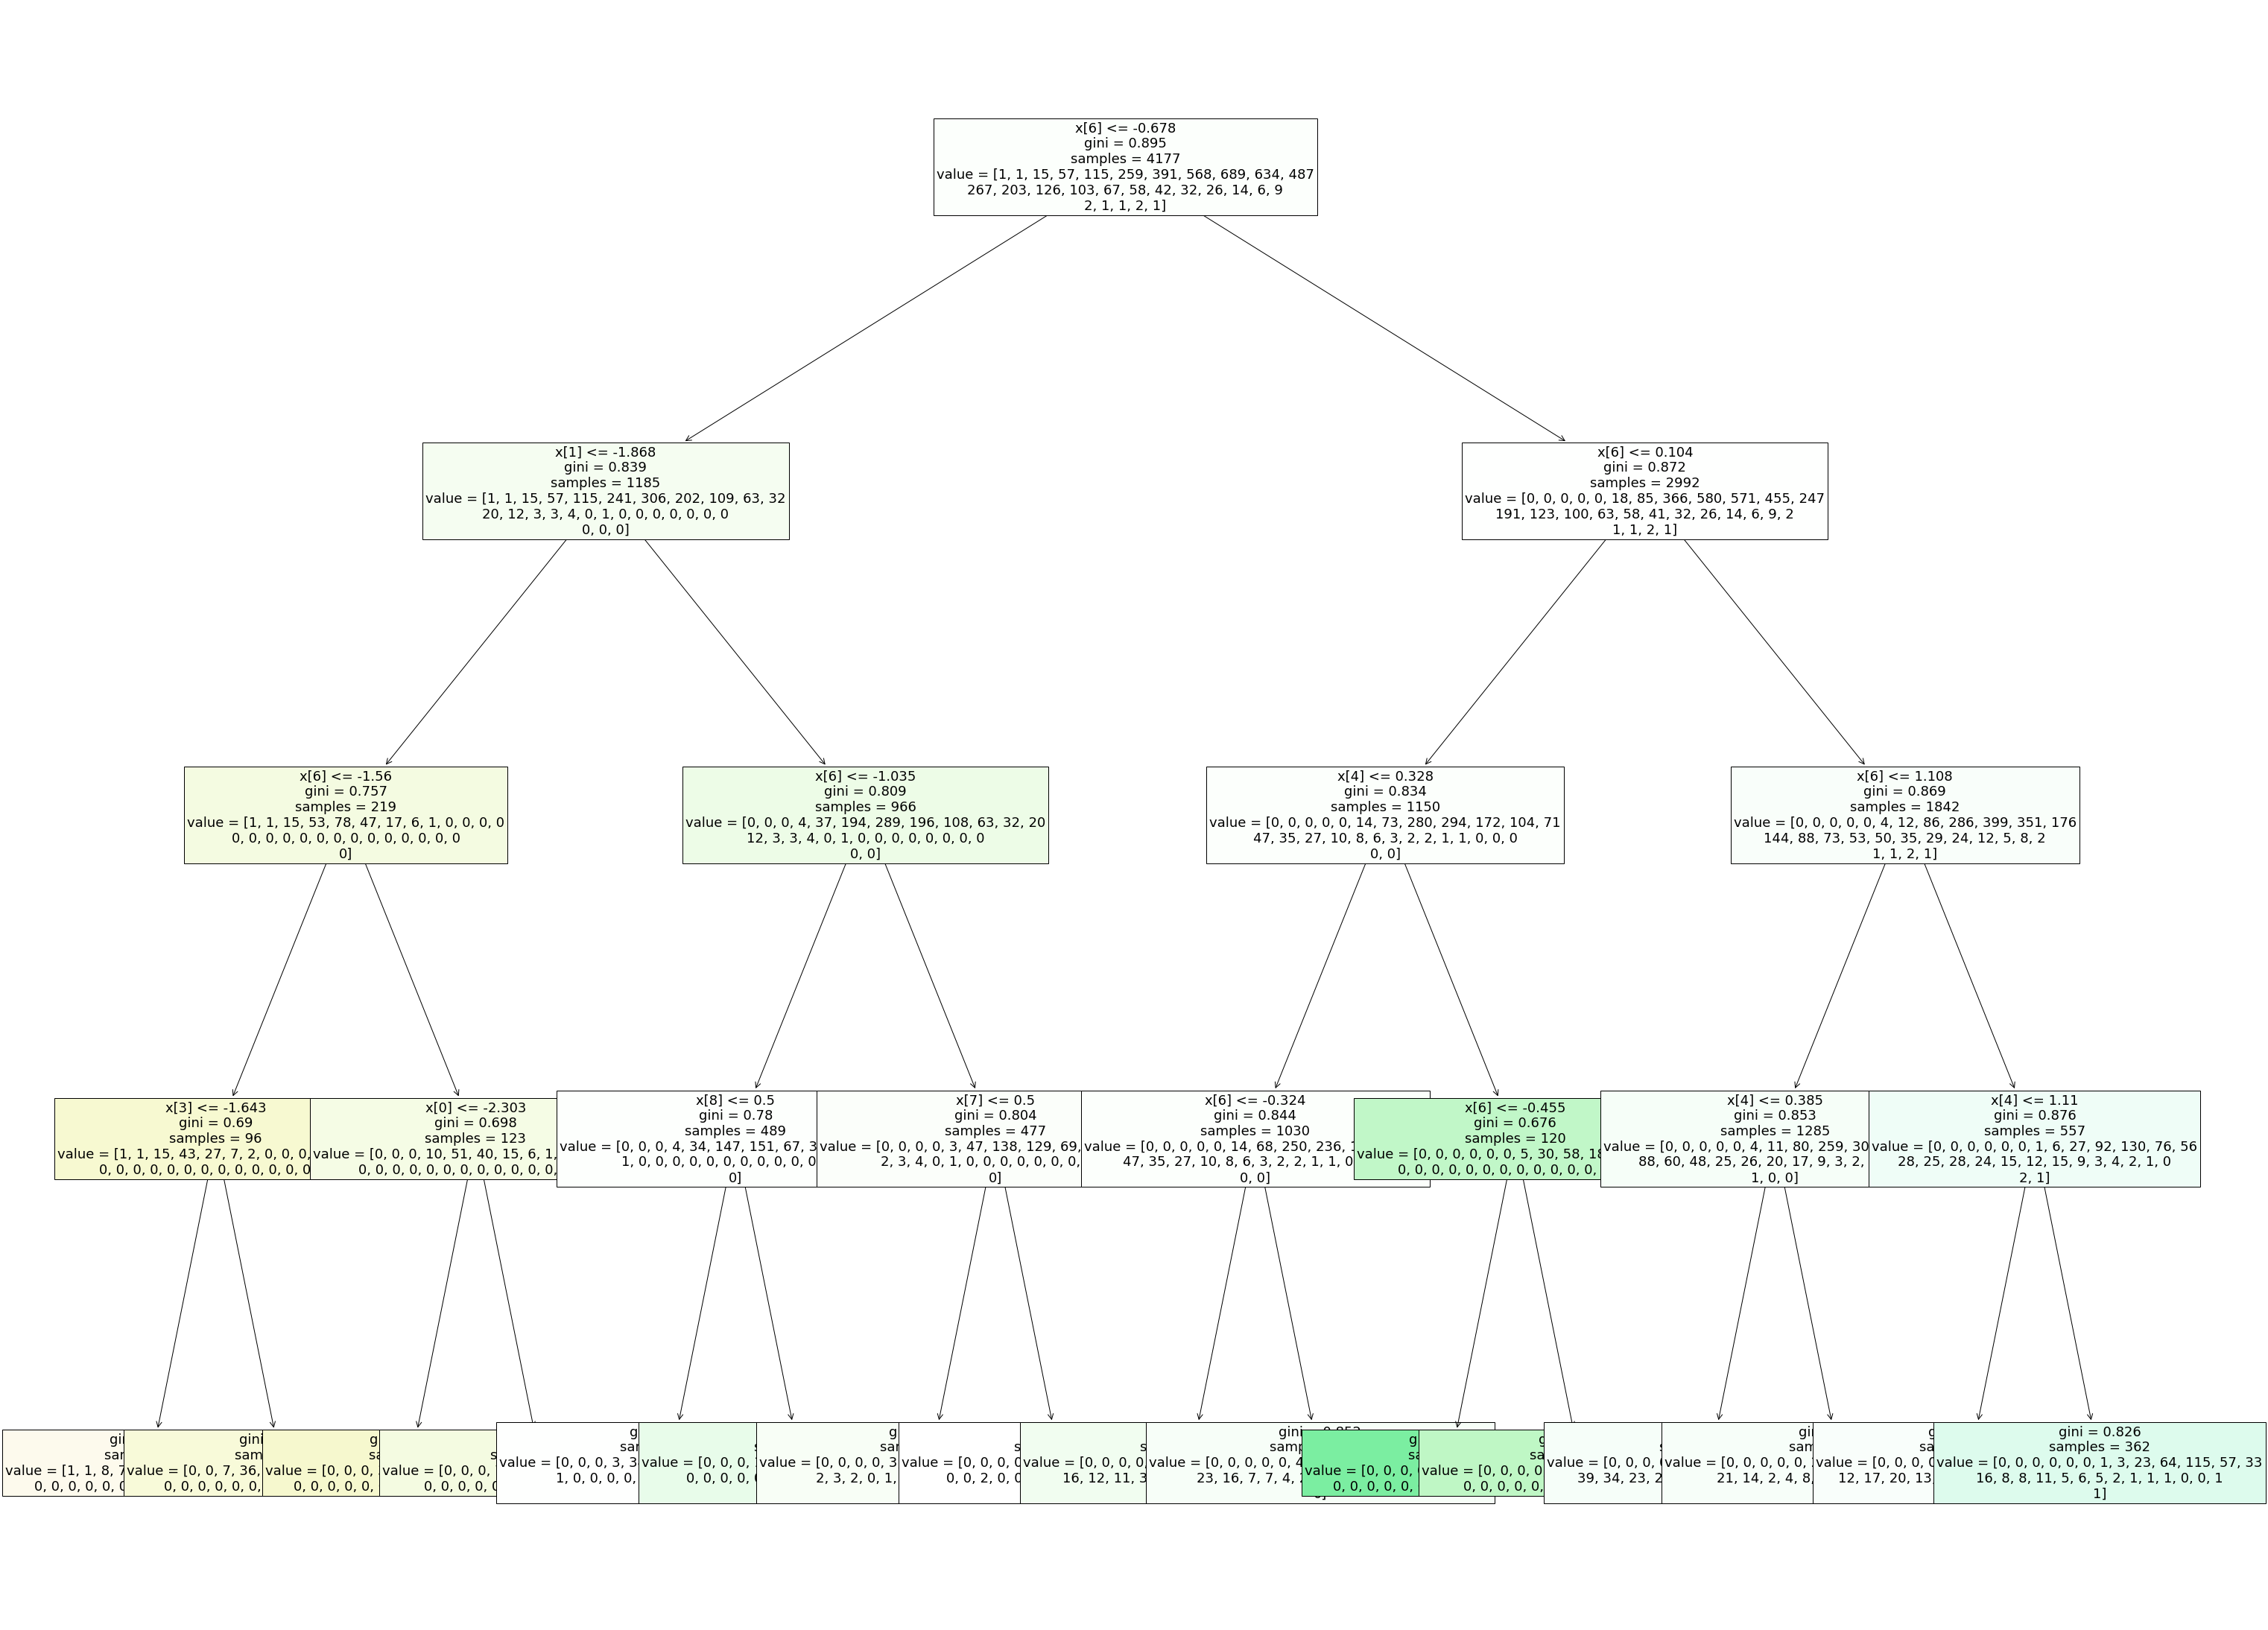

In [ ]:
plt.figure(figsize=(50,40))
plot_tree(best_decision_tree,filled=True,fontsize=18)
plt.show()



###abalone-pca

In [ ]:
min_depth = 1
max_depth = 100
dt_pca_parameters = {'max_depth':[i for i in range(min_depth,max_depth)]}
dt_pca_classifier = DecisionTreeClassifier()
dt_pca_clf = GridSearchCV(estimator=dt_pca_classifier, param_grid=dt_pca_parameters, cv=5, verbose=1)
dt_pca_clf.fit(abalone_pca, Y_all)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...]},
             verbose=1)

Text(0, 0.5, 'Mean test score')

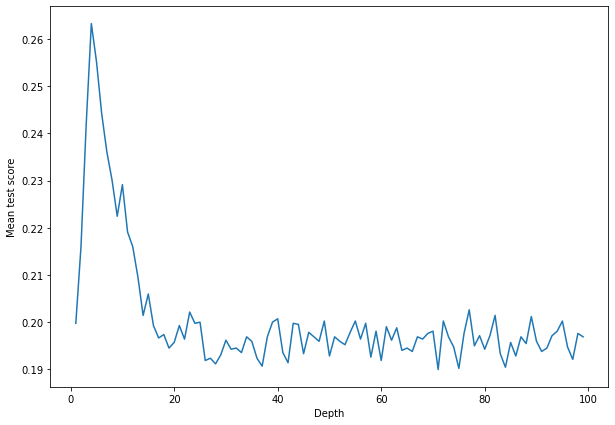

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.lineplot(range(min_depth, max_depth),dt_pca_clf.cv_results_['mean_test_score'])
ax.set_xlabel("Depth")
ax.set_ylabel("Mean test score")

In [ ]:
print("Best performance with Decision Tree on abalone-pca dataset = {}, with parameters = {}".format(dt_pca_clf.best_score_*100, dt_pca_clf.best_params_))

Best performance with Decision Tree on abalone-pca dataset = 26.33515743632352, with parameters = {'max_depth': 4}


In [ ]:
dt_pca_performance = {'model': 'Decision Tree', 'setting': dt_pca_clf.best_params_, 'dataset':'abalone-pca', 'Accuracy': dt_pca_clf.best_score_*100}
best_accuracies = best_accuracies.append(dt_pca_performance, ignore_index=True)

### abalone-lda

In [ ]:
min_depth = 1
max_depth = 100
dt_lda_parameters = {'max_depth':[i for i in range(min_depth,max_depth)]}
dt_lda_classifier = DecisionTreeClassifier()
dt_lda_clf = GridSearchCV(estimator=dt_lda_classifier, param_grid=dt_lda_parameters, cv=5, verbose=1)
dt_lda_clf.fit(abalone_lda, Y_all)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...]},
             verbose=1)

Text(0, 0.5, 'Mean test score')

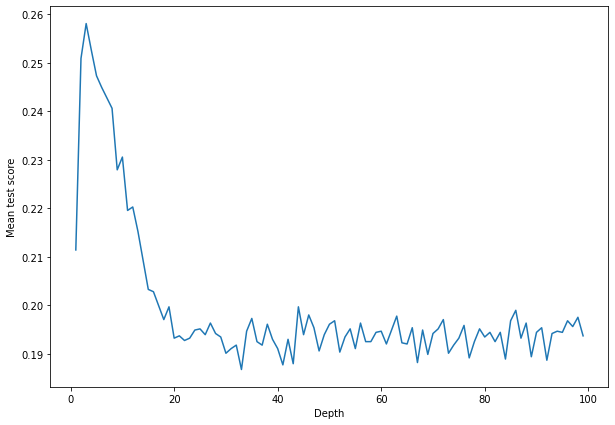

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.lineplot(range(1, max_depth),dt_lda_clf.cv_results_['mean_test_score'])
ax.set_xlabel("Depth")
ax.set_ylabel("Mean test score")

In [ ]:
print("Best performance with Decision Tree on abalone-lda dataset = {}, with parameters = {}".format(dt_lda_clf.best_score_*100, dt_lda_clf.best_params_))

Best performance with Decision Tree on abalone-lda dataset = 25.808297281036012, with parameters = {'max_depth': 3}


In [ ]:
dt_lda_performance = {'model': 'Decision Tree', 'setting': dt_lda_clf.best_params_, 'dataset':'abalone-lda', 'Accuracy': dt_lda_clf.best_score_*100}
best_accuracies = best_accuracies.append(dt_lda_performance, ignore_index=True)

## Random Forest on Abalone

###abalone-raw

In [ ]:
min_depth = 2
max_depth = 20
step_size_depth = 2
step_size_trees = 20
max_trees = 200
min_trees = 3

In [ ]:

rf_raw_parameters = {'n_estimators': [i for i in range(min_trees, max_trees, step_size_trees)], 'max_depth':[i for i in range(min_depth,max_depth,step_size_depth)]}
rf_raw_classifier = RandomForestClassifier()
rf_raw_clf = GridSearchCV(estimator=rf_raw_classifier, param_grid=rf_raw_parameters, cv=5, verbose=3)
rf_raw_clf.fit(abalone_raw, Y_all)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END .......max_depth=2, n_estimators=3;, score=0.207 total time=   0.0s
[CV 2/5] END .......max_depth=2, n_estimators=3;, score=0.279 total time=   0.0s
[CV 3/5] END .......max_depth=2, n_estimators=3;, score=0.241 total time=   0.0s
[CV 4/5] END .......max_depth=2, n_estimators=3;, score=0.268 total time=   0.0s
[CV 5/5] END .......max_depth=2, n_estimators=3;, score=0.262 total time=   0.0s
[CV 1/5] END ......max_depth=2, n_estimators=23;, score=0.214 total time=   0.1s
[CV 2/5] END ......max_depth=2, n_estimators=23;, score=0.272 total time=   0.1s
[CV 3/5] END ......max_depth=2, n_estimators=23;, score=0.263 total time=   0.1s
[CV 4/5] END ......max_depth=2, n_estimators=23;, score=0.265 total time=   0.1s
[CV 5/5] END ......max_depth=2, n_estimators=23;, score=0.273 total time=   0.1s
[CV 1/5] END ......max_depth=2, n_estimators=43;, score=0.214 total time=   0.1s
[CV 2/5] END ......max_depth=2, n_estimators=43

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'n_estimators': [3, 23, 43, 63, 83, 103, 123, 143, 163,
                                          183]},
             verbose=3)

In [ ]:
rf_raw_mean_fit_time = rf_raw_clf.cv_results_['mean_fit_time']
rf_raw_mean_score_time= rf_raw_clf.cv_results_['mean_score_time']

<AxesSubplot:xlabel='param_max_depth', ylabel='param_n_estimators'>

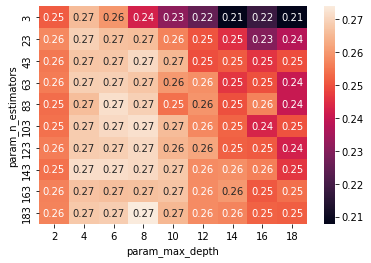

In [ ]:
rf_raw_pvt = pd.pivot_table(pd.DataFrame(rf_raw_clf.cv_results_),
values='mean_test_score', index='param_n_estimators', columns='param_max_depth')
sns.heatmap(rf_raw_pvt, annot = True)

In [ ]:
print("Best performance with Random Forest on abalone-raw dataset = {}, with parameters = {}".format(rf_raw_clf.best_score_*100, rf_raw_clf.best_params_))

Best performance with Random Forest on abalone-raw dataset = 27.388476635246256, with parameters = {'max_depth': 8, 'n_estimators': 183}


In [ ]:
rf_raw_performance = {'model': 'Random Forest', 'setting': rf_raw_clf.best_params_, 'dataset':'abalone-raw', 'Accuracy': rf_raw_clf.best_score_*100}
best_accuracies = best_accuracies.append(performance, ignore_index=True)

###abalone-pca

In [ ]:
# min_depth = 2
# max_depth = 10
# step_size_trees = 20
# step_size_depth = 5
# max_trees = 100
# min_trees = 3
rf_pca_parameters = {'n_estimators': [i for i in range(min_trees, max_trees, step_size_trees)], 'max_depth':[i for i in range(min_depth,max_depth,step_size_depth)]}
rf_pca_classifier = RandomForestClassifier()
rf_pca_clf = GridSearchCV(estimator=rf_pca_classifier, param_grid=rf_pca_parameters, cv=5, verbose=3)
rf_pca_clf.fit(abalone_pca, Y_all)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END .......max_depth=2, n_estimators=3;, score=0.195 total time=   0.0s
[CV 2/5] END .......max_depth=2, n_estimators=3;, score=0.226 total time=   0.0s
[CV 3/5] END .......max_depth=2, n_estimators=3;, score=0.235 total time=   0.0s
[CV 4/5] END .......max_depth=2, n_estimators=3;, score=0.243 total time=   0.0s
[CV 5/5] END .......max_depth=2, n_estimators=3;, score=0.250 total time=   0.0s
[CV 1/5] END ......max_depth=2, n_estimators=23;, score=0.245 total time=   0.1s
[CV 2/5] END ......max_depth=2, n_estimators=23;, score=0.233 total time=   0.1s
[CV 3/5] END ......max_depth=2, n_estimators=23;, score=0.212 total time=   0.1s
[CV 4/5] END ......max_depth=2, n_estimators=23;, score=0.241 total time=   0.1s
[CV 5/5] END ......max_depth=2, n_estimators=23;, score=0.247 total time=   0.1s
[CV 1/5] END ......max_depth=2, n_estimators=43;, score=0.220 total time=   0.2s
[CV 2/5] END ......max_depth=2, n_estimators=43

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'n_estimators': [3, 23, 43, 63, 83, 103, 123, 143, 163,
                                          183]},
             verbose=3)

In [ ]:
rf_pca_mean_fit_time = rf_pca_clf.cv_results_['mean_fit_time']
rf_pca_mean_score_time= rf_pca_clf.cv_results_['mean_score_time']

<AxesSubplot:xlabel='param_max_depth', ylabel='param_n_estimators'>

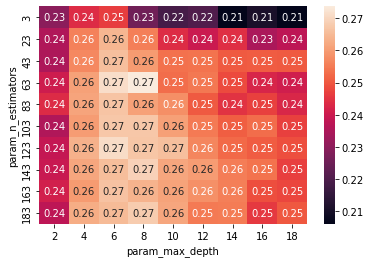

In [ ]:
rf_pca_pvt = pd.pivot_table(pd.DataFrame(rf_pca_clf.cv_results_),
values='mean_test_score', index='param_n_estimators', columns='param_max_depth')
sns.heatmap(rf_pca_pvt, annot = True)

In [ ]:
print("Best performance with Random Forest on abalone-pca dataset = {}, with parameters = {}".format(rf_pca_clf.best_score_*100, rf_pca_clf.best_params_))

Best performance with Random Forest on abalone-pca dataset = 27.36492565109016, with parameters = {'max_depth': 8, 'n_estimators': 63}


In [ ]:
rf_pca_performance = {'model': 'Random Forest', 'setting': rf_pca_clf.best_params_, 'dataset':'abalone-pca', 'Accuracy': rf_pca_clf.best_score_*100}
best_accuracies = best_accuracies.append(rf_pca_performance, ignore_index=True)

###abalone-lda

In [ ]:
# min_depth = 2
# max_depth = 10
# step_size_trees = 20
# step_size_depth = 5
# max_trees = 100
# min_trees = 3
rf_lda_parameters = {'n_estimators': [i for i in range(min_trees, max_trees, step_size_trees)], 'max_depth':[i for i in range(min_depth,max_depth,step_size_depth)]}
rf_lda_classifier = RandomForestClassifier()
rf_lda_clf = GridSearchCV(estimator=rf_lda_classifier, param_grid=rf_lda_parameters, cv=5, verbose=3)
rf_lda_clf.fit(abalone_lda, Y_all)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END .......max_depth=2, n_estimators=3;, score=0.217 total time=   0.0s
[CV 2/5] END .......max_depth=2, n_estimators=3;, score=0.200 total time=   0.0s
[CV 3/5] END .......max_depth=2, n_estimators=3;, score=0.238 total time=   0.0s
[CV 4/5] END .......max_depth=2, n_estimators=3;, score=0.260 total time=   0.0s
[CV 5/5] END .......max_depth=2, n_estimators=3;, score=0.255 total time=   0.0s
[CV 1/5] END ......max_depth=2, n_estimators=23;, score=0.240 total time=   0.1s
[CV 2/5] END ......max_depth=2, n_estimators=23;, score=0.240 total time=   0.1s
[CV 3/5] END ......max_depth=2, n_estimators=23;, score=0.243 total time=   0.1s
[CV 4/5] END ......max_depth=2, n_estimators=23;, score=0.271 total time=   0.1s
[CV 5/5] END ......max_depth=2, n_estimators=23;, score=0.261 total time=   0.1s
[CV 1/5] END ......max_depth=2, n_estimators=43;, score=0.237 total time=   0.2s
[CV 2/5] END ......max_depth=2, n_estimators=43

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'n_estimators': [3, 23, 43, 63, 83, 103, 123, 143, 163,
                                          183]},
             verbose=3)

In [ ]:
rf_lda_mean_fit_time = rf_lda_clf.cv_results_['mean_fit_time']
rf_lda_mean_score_time= rf_lda_clf.cv_results_['mean_score_time']

<AxesSubplot:xlabel='param_max_depth', ylabel='param_n_estimators'>

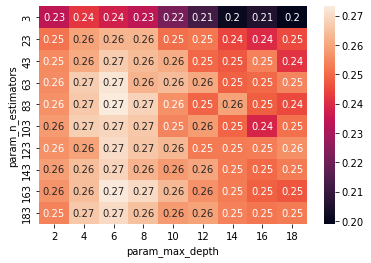

In [ ]:
rf_lda_pvt = pd.pivot_table(pd.DataFrame(rf_lda_clf.cv_results_),
values='mean_test_score', index='param_n_estimators', columns='param_max_depth')
sns.heatmap(rf_lda_pvt, annot = True)

In [ ]:
print("Best performance with Random Forest on abalone-lda dataset = {}, with parameters = {}".format(rf_lda_clf.best_score_*100, rf_lda_clf.best_params_))

Best performance with Random Forest on abalone-lda dataset = 27.31676360198264, with parameters = {'max_depth': 6, 'n_estimators': 83}


In [ ]:
rf_lda_performance = {'model': 'Random Forest', 'setting': rf_lda_clf.best_params_, 'dataset':'abalone-lda', 'Accuracy': rf_lda_clf.best_score_*100}
best_accuracies = best_accuracies.append(rf_lda_performance, ignore_index=True)

## Gradient Tree Boosting - Abalone

###abalone-raw

In [ ]:
# min_depth = 2
# max_depth = 10
# step_size_trees = 20
# step_size_depth = 5
# max_trees = 100
# min_trees = 3
#parameters = {'n_estimators': [i for i in range(min_trees, max_trees, step_size_trees)], 'max_depth':[i for i in range(min_depth,max_depth,step_size_depth)]}
gtb_raw_parameters = {'n_estimators': [80, 160, 180], 'max_depth':[3, 7 , 11]}
gtb_raw_classifier = GradientBoostingClassifier()
gtb_raw_clf = GridSearchCV(estimator=gtb_raw_classifier, param_grid=gtb_raw_parameters, cv=5, verbose=3)
gtb_raw_clf.fit(abalone_raw, Y_all)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ......max_depth=3, n_estimators=80;, score=0.209 total time=  16.2s
[CV 2/5] END ......max_depth=3, n_estimators=80;, score=0.267 total time=  17.6s
[CV 3/5] END ......max_depth=3, n_estimators=80;, score=0.247 total time=  17.8s
[CV 4/5] END ......max_depth=3, n_estimators=80;, score=0.268 total time=  18.4s
[CV 5/5] END ......max_depth=3, n_estimators=80;, score=0.283 total time=  16.3s
[CV 1/5] END .....max_depth=3, n_estimators=160;, score=0.193 total time=  31.5s
[CV 2/5] END .....max_depth=3, n_estimators=160;, score=0.261 total time=  32.3s
[CV 3/5] END .....max_depth=3, n_estimators=160;, score=0.249 total time=  32.5s
[CV 4/5] END .....max_depth=3, n_estimators=160;, score=0.251 total time=  33.2s
[CV 5/5] END .....max_depth=3, n_estimators=160;, score=0.253 total time=  31.6s
[CV 1/5] END .....max_depth=3, n_estimators=180;, score=0.207 total time=  35.0s
[CV 2/5] END .....max_depth=3, n_estimators=180;,

KeyboardInterrupt: ignored

In [ ]:
# pvt = pd.pivot_table(pd.DataFrame(clf.cv_results_),
# values='mean_test_score', index='param_n_estimators', columns='param_max_depth')
# sns.heatmap(pvt, annot = True)

gtb_raw_mean_fit_time = gtb_raw_clf.cv_results_['mean_fit_time']
gtb_raw_mean_score_time= gtb_raw_clf.cv_results_['mean_score_time']
gtb_raw_pvt = pd.pivot_table(pd.DataFrame(gtb_raw_clf.cv_results_),
values='mean_test_score', index='param_n_estimators', columns='param_max_depth')
plt.figure(figsize=(8, 6))
sns.heatmap(gtb_raw_pvt, annot = True)
plt.show()

In [ ]:
print("Best performance with Gradient Tree Boosting on abalone-raw dataset = {}, with parameters = {}".format(gtb_raw_clf.best_score_*100, gtb_raw_clf.best_params_))

In [ ]:
performance = {'model': 'Gradient Tree Boosting', 'setting': gtb_raw_clf.best_params_, 'dataset':'abalone-raw', 'Accuracy': gtb_raw_clf.best_score_*100}
best_accuracies = best_accuracies.append(performance, ignore_index=True)

### abalone-pca

In [ ]:
# min_depth = 2
# max_depth = 10
# step_size_trees = 20
# step_size_depth = 5
# max_trees = 100
# min_trees = 3
#parameters = {'n_estimators': [i for i in range(min_trees, max_trees, step_size_trees)], 'max_depth':[i for i in range(min_depth,max_depth,step_size_depth)]}
gtb_pca_parameters = {'n_estimators': [80, 160, 180], 'max_depth':[3, 7 , 11]}
gtb_pca_classifier = GradientBoostingClassifier()
gtb_pca_clf = GridSearchCV(estimator=gtb_pca_classifier, param_grid=gtb_pca_parameters, cv=5, verbose=3)
gtb_pca_clf.fit(abalone_pca, Y_all)

In [ ]:
gtb_pca_mean_fit_time = gtb_pca_clf.cv_results_['mean_fit_time']
gtb_pca_mean_score_time= gtb_pca_clf.cv_results_['mean_score_time']
gtb_pca_pvt = pd.pivot_table(pd.DataFrame(gtb_pca_clf.cv_results_),
                           
values='mean_test_score', index='param_n_estimators', columns='param_max_depth')
sns.heatmap(gtb_pca_pvt, annot = True)

In [ ]:
print("Best performance with Gradient Tree Boosting on abalone-pca dataset = {}, with parameters = {}".format(gtb_pca_clf.best_score_*100, gtb_pca_clf.best_params_))

In [ ]:
gtb_pca_performance = {'model': 'Gradient Tree Boosting', 'setting': gtb_pca_clf.best_params_, 'dataset':'abalone-pca', 'Accuracy': gtb_pca_clf.best_score_*100}
best_accuracies = best_accuracies.append(gtb_pca_performance, ignore_index=True)

###abalone-lda

In [ ]:
# min_depth = 2
# max_depth = 10
# step_size_trees = 20
# step_size_depth = 5
# max_trees = 100
# min_trees = 3
#parameters = {'n_estimators': [i for i in range(min_trees, max_trees, step_size_trees)], 'max_depth':[i for i in range(min_depth,max_depth,step_size_depth)]}
gtb_lda_parameters = {'n_estimators': [80, 160, 180], 'max_depth':[3, 7 , 11]}
gtb_lda_classifier = GradientBoostingClassifier()
gtb_lda_clf = GridSearchCV(estimator=gtb_lda_classifier, param_grid=gtb_lda_parameters, cv=5, verbose=3)
gtb_lda_clf.fit(abalone_lda, Y_all)

In [ ]:
gtb_lda_mean_fit_time = gtb_lda_clf.cv_results_['mean_fit_time']
gtb_lda_mean_score_time= gtb_lda_clf.cv_results_['mean_score_time']
gtb_lda_pvt = pd.pivot_table(pd.DataFrame(gtb_lda_clf.cv_results_),
values='mean_test_score', index='param_n_estimators', columns='param_max_depth')
sns.heatmap(gtb_lda_pvt, annot = True)

In [ ]:
print("Best performance with Gradient Tree Boosting on abalone-lda dataset = {}, with parameters = {}".format(gtb_lda_clf.best_score_*100, gtb_lda_clf.best_params_))

In [ ]:
gtb_lda_performance = {'model': 'Gradient Tree Boosting', 'setting': gtb_lda_clf.best_params_, 'dataset':'abalone-lda', 'Accuracy': gtb_lda_clf.best_score_*100}
best_accuracies = best_accuracies.append(gtb_lda_performance, ignore_index=True)

##Best Accuracy

In [436]:
best_accuracies

,model,setting,dataset,Accuracy
0,KNN,n_neighbors = 84 (from prev assgn),abalone-raw,25.119617
1,KNN,n_neighbors = 84 (from prev assgn),abalone-pca,25.119617
2,KNN,n_neighbors = 84 (from prev assgn),abalone-lda,25.717703
3,Naive Bayes,Gaussian,abalone-raw,22.074607
4,Naive Bayes,Gaussian,abalone-pca,22.169957
5,Naive Bayes,Gaussian,abalone-lda,23.318454
6,Naive Bayes,Multinomial,abalone-raw,16.662579
7,Naive Bayes,Multinomial,abalone-raw,16.495086
8,Naive Bayes,Multinomial,abalone-lda,16.495086
9,Naive Bayes,Complement,abalone-raw,14.747586


## Comparing runtime with Random Forest

In [437]:
runtime_comparison = pd.DataFrame(columns=['Dataset','Random Forest', 'Gradient Tree Boosting'])
row = {'Dataset': 'abalone-raw', 'Random Forest': np.mean(rf_raw_mean_fit_time), 'Gradient Tree Boosting': np.mean(gtb_raw_mean_fit_time)}
runtime_comparison = runtime_comparison.append(row, ignore_index=True)
row = {'Dataset': 'abalone-pca', 'Random Forest': np.mean(rf_pca_mean_fit_time), 'Gradient Tree Boosting': np.mean(gtb_pca_mean_fit_time)}
runtime_comparison = runtime_comparison.append(row, ignore_index=True)
row = {'Dataset': 'abalone-lda', 'Random Forest': np.mean(rf_lda_mean_fit_time), 'Gradient Tree Boosting': np.mean(gtb_lda_mean_fit_time)}
runtime_comparison = runtime_comparison.append(row, ignore_index=True)

runtime_comparison

NameError: ignored

# Wine Dataset

## Loading the Wine datasets

In [438]:
redwine_data = pd.read_csv('/content/winequality-red.csv', sep=';')
redwine_data["type"] = 1.0
whitewine_data = pd.read_csv('/content/winequality-white.csv', sep=';')
whitewine_data["type"] = 0.0

In [439]:
wine_data = pd.concat([redwine_data, whitewine_data])

In [440]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [441]:
wine_data['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [442]:
n_classes = len(wine_data['quality'].unique())

In [443]:
wineData_X = wine_data.iloc[:, wine_data.columns != "quality"]
wineData_Y = wine_data["quality"]

In [444]:
wineData_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1.0


In [445]:
wineData_X.iloc[:,[2,6,7,8,11]]

,citric acid,total sulfur dioxide,density,pH,type
0,0.00,34.0,0.99780,3.51,1.0
1,0.00,67.0,0.99680,3.20,1.0
2,0.04,54.0,0.99700,3.26,1.0
3,0.56,60.0,0.99800,3.16,1.0
4,0.00,34.0,0.99780,3.51,1.0
...,...,...,...,...,...
4893,0.29,92.0,0.99114,3.27,0.0
4894,0.36,168.0,0.99490,3.15,0.0
4895,0.19,111.0,0.99254,2.99,0.0
4896,0.30,110.0,0.98869,3.34,0.0


In [446]:
best_accuracies = pd.DataFrame(columns=['model', 'setting', "dataset", "Accuracy"])

### Normalizing the dataset

In [447]:
scaler = StandardScaler()
wineDataNormalized_X = scaler.fit_transform(wineData_X)

## Applying PCA on the Wine dataset

In [448]:
pca_wine = PCA()
pca_wine_transformed = pca_wine.fit_transform(wineDataNormalized_X)
pca_wine_transformed.shape

(6497, 12)

In [449]:
pca_wine.explained_variance_

array([3.80998397, 2.52913691, 1.56173982, 0.97098774, 0.72392469,
       0.613635  , 0.53644865, 0.50306184, 0.35250665, 0.25687178,
       0.11939928, 0.02415097])

In [450]:
pca_wine.explained_variance_ratio_

array([0.3174498 , 0.21072897, 0.13012495, 0.08090319, 0.06031777,
       0.05112838, 0.04469717, 0.04191537, 0.02937103, 0.02140269,
       0.00994841, 0.00201227])

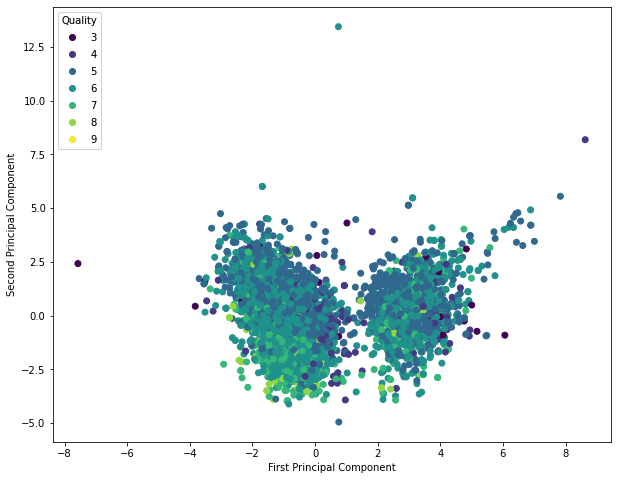

In [451]:

fig, ax = plt.subplots(1,1,figsize=(10,8))
# plt.figure(figsize=(8,6))
scatter = ax.scatter(pca_wine_transformed[:,0],pca_wine_transformed[:,1],c = wine_data['quality'])
legend1 = ax.legend(*scatter.legend_elements(num=7),
                    loc="best", title="Quality")
ax.add_artist(legend1)
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
# plt.legend(title='Quality', loc='best', labels= wine_data['quality'].unique())
plt.show()

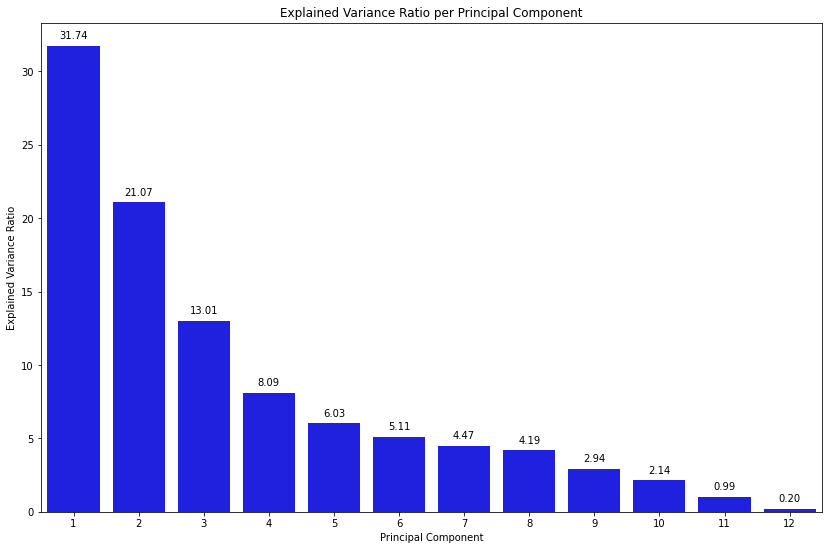

In [452]:
explained_var=(pca_wine.explained_variance_ratio_)*100
plt.figure(figsize=(14,9))
sns.barplot(x=list(range(1, len(pca_wine.explained_variance_ratio_)+1)), y=explained_var, color="b")
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')
for i, value in enumerate(explained_var):
    plt.text(i, value+0.5, f"{value:.2f}",color='black', ha='center')
plt.show()

#fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
#fig.show()

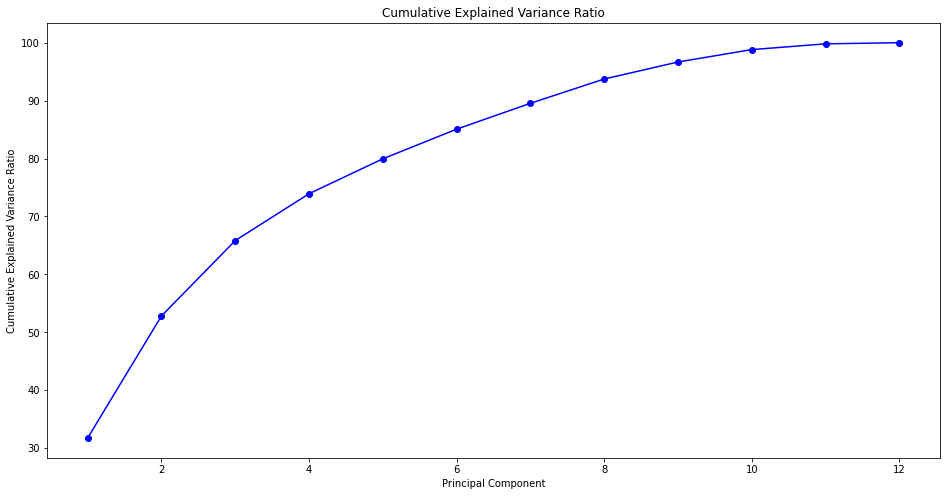

In [453]:
#sns.barplot(x=list(range(1, len(pca_wine.explained_variance_ratio_)+1)), y=np.cumsum(pca_wine.explained_variance_ratio_), color="b")
plt.figure(figsize=(16,8))
plt.plot(list(range(1, len(pca_wine.explained_variance_ratio_)+1)), np.cumsum(100*pca_wine.explained_variance_ratio_), color="b",marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.show()

## Optimizing KNN classifier with PCA

In [454]:
test_accuracies = []
num_components = []
for n_components in range(2,pca_wine_transformed.shape[1]):
  X_train, X_test, Y_train, Y_test = train_test_split(pca_wine_transformed[:,0:n_components], wineData_Y, test_size=0.2, random_state=69)
  classifier = KNeighborsClassifier(n_neighbors = 84, weights = 'distance')
  classifier = classifier.fit(X_train, Y_train)
  test_score = classifier.score(X_test, Y_test)
  test_accuracies.append(test_score*100)
  num_components.append(n_components)



In [455]:
print("Best test accuracy: ", max(test_accuracies))
print("Num of components: ", num_components[np.argmax(test_accuracies)])
best_pca_components = num_components[np.argmax(test_accuracies)]

Best test accuracy:  68.23076923076923
Num of components:  9


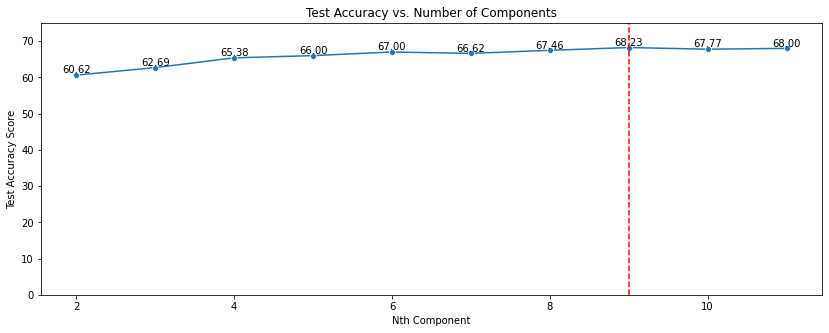

In [456]:
# plt.figure(figsize=(10,7))
# ax = sns.lineplot(num_components,test_accuracies)
# ax.set_xlabel("n_components")
# ax.set_ylabel("Test Accuracy Score")

plt.figure(figsize=(14,5))
ax = sns.lineplot(range(2, len(test_accuracies)+2),test_accuracies,markers=True, marker='o')
ax.set_xlabel("Nth Component")
ax.set_ylabel("Test Accuracy Score")
ax.set_title("Test Accuracy vs. Number of Components")
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Find the index of the maximum value
max_index = np.argmax(test_accuracies)

# Plot a vertical line at the corresponding x-value
ax.axvline(max_index+2, color='r', linestyle='--')


# # Display the values on the plot
for i, value in enumerate(test_accuracies):
    ax.text(i+2, value, f"{value:.2f}", horizontalalignment='center', verticalalignment='bottom')

plt.ylim(0, 75)
plt.show()


## Linear Discriminant Analysis

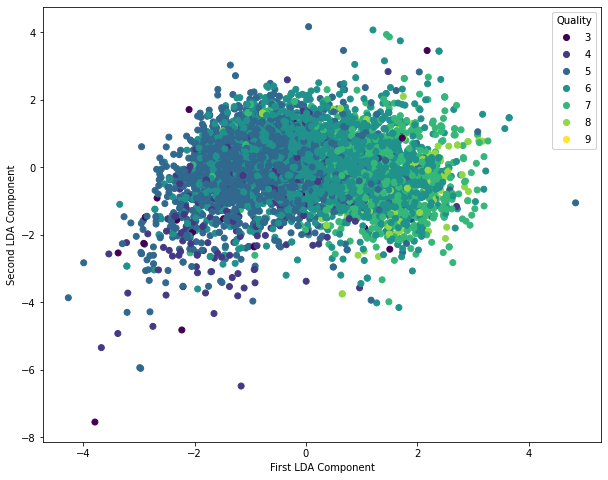

In [457]:
lda_wine = LinearDiscriminantAnalysis()
wine_lda_transformed = lda_wine.fit_transform(wineDataNormalized_X, wineData_Y)
fig, ax = plt.subplots(1,1,figsize=(10,8))
# plt.figure(figsize=(8,6))
scatter = ax.scatter(wine_lda_transformed[:,0],wine_lda_transformed[:,1],c = wine_data['quality'])
legend1 = ax.legend(*scatter.legend_elements(num=7),
                    loc="best", title="Quality")
ax.add_artist(legend1)
ax.set_xlabel('First LDA Component')
ax.set_ylabel('Second LDA Component')
# plt.legend(title='Quality', loc='best', labels= wine_data['quality'].unique())
plt.show()

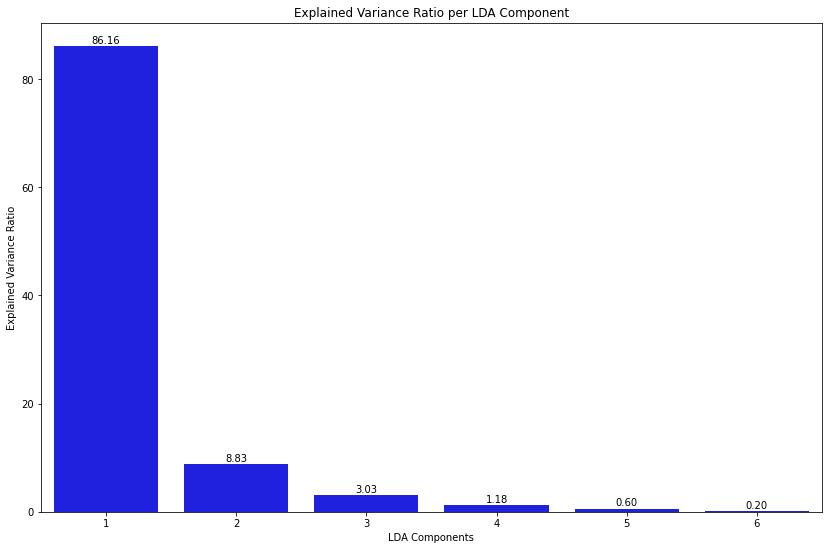

In [458]:
explained_var=(lda_wine.explained_variance_ratio_)*100
plt.figure(figsize=(14,9))
sns.barplot(x=list(range(1, len(explained_var)+1)), y=explained_var, color="b")
plt.xlabel('LDA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per LDA Component')
for i, value in enumerate(explained_var):
    plt.text(i, value+0.5, f"{value:.2f}",color='black', ha='center')
plt.show()

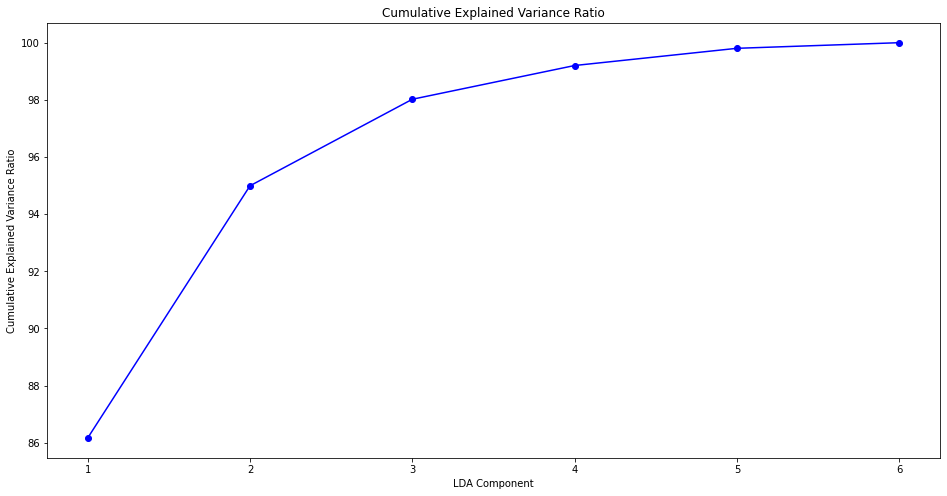

In [459]:
plt.figure(figsize=(16,8))
plt.plot(list(range(1, len(explained_var)+1)), np.cumsum(explained_var), color="b",marker='o')
plt.xlabel('LDA Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.show()

In [460]:
test_accuracies = []
num_components = []
for n_components in range(1,min(n_classes-1,wineDataNormalized_X.shape[1])+1):
  clf = LinearDiscriminantAnalysis(n_components=n_components)
  wine_lda_transformed = clf.fit_transform(wineDataNormalized_X, wineData_Y)
  X_train, X_test, Y_train, Y_test = train_test_split(wine_lda_transformed, wineData_Y, test_size=0.2, random_state=69)
  classifier = KNeighborsClassifier(n_neighbors = 84, weights = 'distance')
  classifier = classifier.fit(X_train, Y_train)
  test_score = classifier.score(X_test, Y_test)
  test_accuracies.append(test_score*100)
  num_components.append(n_components)

In [461]:
print("Best test accuracy: ", max(test_accuracies))
print("Num of components: ", num_components[np.argmax(test_accuracies)])
best_num_components = num_components[np.argmax(test_accuracies)]

Best test accuracy:  68.53846153846153
Num of components:  5


Text(0, 0.5, 'Test Accuracy Score')

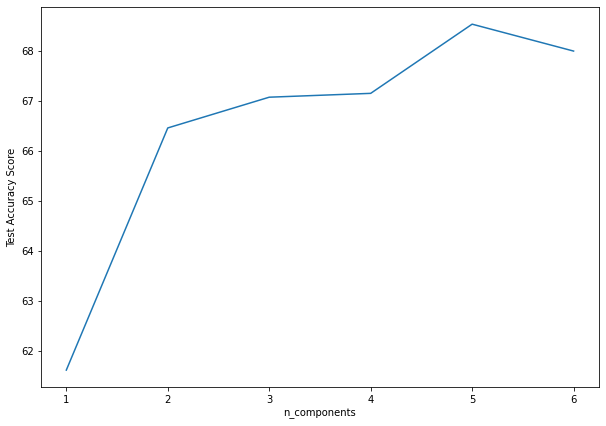

In [462]:
plt.figure(figsize=(10,7))
ax = sns.lineplot(num_components,test_accuracies)
ax.set_xlabel("n_components")
ax.set_ylabel("Test Accuracy Score")

In [463]:
clf = LinearDiscriminantAnalysis(n_components=best_num_components)
wine_lda_transformed = clf.fit_transform(wineDataNormalized_X, wineData_Y)
wine_lda_transformed.shape

(6497, 5)

## t-SNE for Wine Datast

In [464]:
tsne = TSNE()
tsne_transformed = tsne.fit_transform(wineDataNormalized_X)

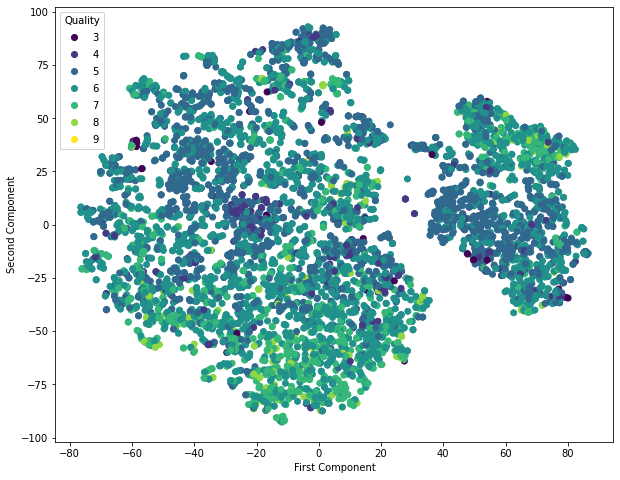

In [465]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
scatter = ax.scatter(tsne_transformed[:,0],tsne_transformed[:,1],c = wineData_Y)
legend1 = ax.legend(*scatter.legend_elements(num=n_classes),
                    loc="best", title="Quality")
ax.add_artist(legend1)
ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
plt.show()

## The 3 datasets of Wine

In [466]:
wine_raw = wineDataNormalized_X
wine_pca = pca_wine_transformed[:,0:best_pca_components]
wine_lda = wine_lda_transformed

## KNN

### wine-raw

In [467]:
X_train, X_test, Y_train, Y_test = train_test_split(wine_raw, wineData_Y, test_size=0.2, random_state=69)
classifier = KNeighborsClassifier(n_neighbors = 84, weights = 'distance')
classifier = classifier.fit(X_train, Y_train)
score = classifier.score(X_test, Y_test)*100

print("Best performance with KNN on wine-raw dataset = {}, with parameters = {}".format(score, "n_neighbors = 84 (from prev assgn)"))
performance = {'model': 'KNN', 'setting': "n_neighbors = 84 (from prev assgn)", 'dataset':'wine-raw', 'Accuracy': score}
best_accuracies = best_accuracies.append(performance, ignore_index=True)

Best performance with KNN on wine-raw dataset = 68.3076923076923, with parameters = n_neighbors = 84 (from prev assgn)


### wine-pca

In [468]:
X_train, X_test, Y_train, Y_test = train_test_split(wine_pca, wineData_Y, test_size=0.2, random_state=69)
classifier = KNeighborsClassifier(n_neighbors = 84, weights = 'distance')
classifier = classifier.fit(X_train, Y_train)
score = classifier.score(X_test, Y_test)*100

print("Best performance with KNN on wine-pca dataset = {}, with parameters = {}".format(score, "n_neighbors = 84 (from prev assgn)"))
performance = {'model': 'KNN', 'setting': "n_neighbors = 84 (from prev assgn)", 'dataset':'wine-pca', 'Accuracy': score}
best_accuracies = best_accuracies.append(performance, ignore_index=True)

Best performance with KNN on wine-pca dataset = 68.23076923076923, with parameters = n_neighbors = 84 (from prev assgn)


### wine-lda

In [469]:
X_train, X_test, Y_train, Y_test = train_test_split(wine_lda, wineData_Y, test_size=0.2, random_state=69)
classifier = KNeighborsClassifier(n_neighbors = 84, weights = 'distance')
classifier = classifier.fit(X_train, Y_train)
score = classifier.score(X_test, Y_test)*100

print("Best performance with KNN on wine-lda dataset = {}, with parameters = {}".format(score, "n_neighbors = 84 (from prev assgn)"))
performance = {'model': 'KNN', 'setting': "n_neighbors = 84 (from prev assgn)", 'dataset':'wine-lda', 'Accuracy': score}
best_accuracies = best_accuracies.append(performance, ignore_index=True)

Best performance with KNN on wine-lda dataset = 68.53846153846153, with parameters = n_neighbors = 84 (from prev assgn)


## Naive Bayes (Gaussian)

### wine-raw

In [470]:
#X_train, X_test, Y_train, Y_test = train_test_split(wine_raw, Y, test_size=0.2, random_state=69)
classifier = GaussianNB()
cross_val_scores = cross_val_score(estimator = classifier, X = wine_raw, y = wineData_Y, cv = 5)
avg_score = np.mean(cross_val_scores)*100
print("Average Cross-validation score on raw dataset: ", avg_score)
performance = {'model': 'Naive Bayes', 'setting': "Gaussian", 'dataset':'wine-raw', 'Accuracy': avg_score}
best_accuracies = best_accuracies.append(performance, ignore_index=True)

Average Cross-validation score on raw dataset:  30.121039853141475


### wine-pca

In [471]:
#X_train, X_test, Y_train, Y_test = train_test_split(wine_raw, Y, test_size=0.2, random_state=69)
classifier = GaussianNB()
cross_val_scores = cross_val_score(estimator = classifier, X = wine_pca, y = wineData_Y, cv = 5)
avg_score = np.mean(cross_val_scores)*100
print("Average Cross-validation score on PCA transformed dataset: ", avg_score)
performance = {'model': 'Naive Bayes', 'setting': "Gaussian", 'dataset':'wine-pca', 'Accuracy': avg_score}
best_accuracies = best_accuracies.append(performance, ignore_index=True)

Average Cross-validation score on PCA transformed dataset:  44.99183987682833


### wine-lda

In [472]:
#X_train, X_test, Y_train, Y_test = train_test_split(wine_raw, Y, test_size=0.2, random_state=69)
classifier = GaussianNB()
cross_val_scores = cross_val_score(estimator = classifier, X = wine_lda, y = wineData_Y, cv = 5)
avg_score = np.mean(cross_val_scores)*100
print("Average Cross-validation score on LDA transformed dataset: ", avg_score)
performance = {'model': 'Naive Bayes', 'setting': "Gaussian", 'dataset':'wine-lda', 'Accuracy': avg_score}
best_accuracies = best_accuracies.append(performance, ignore_index=True)

Average Cross-validation score on LDA transformed dataset:  52.97871735654647


## Naive Bayes (Multinomial)


##abalone-raw

In [473]:
data_mnb_raw=wineData_X
scaler_mnb_raw = MinMaxScaler()
wine_raw_minmax = scaler_mnb_raw.fit_transform(data_mnb_raw)

classifier_mnb_raw_wine = MultinomialNB()
cross_val_scores_mnb_raw_wine = cross_val_score(estimator = classifier_mnb_raw_wine, X =wine_raw_minmax, y = wineData_Y, cv = 5)
avg_score_mnb_raw_wine = np.mean(cross_val_scores_mnb_raw_wine)*100
print("Average Cross-validation score on raw dataset: ", avg_score_mnb_raw_wine)
performance_mnb_raw_wine = {'model': 'Naive Bayes', 'setting': "Multinomial", 'dataset':'wine-raw', 'Accuracy': avg_score_mnb_raw_wine}
best_accuracies = best_accuracies.append(performance_mnb_raw_wine, ignore_index=True)

Average Cross-validation score on raw dataset:  41.512465209924784


###abalone-pca

In [474]:
data_mnb_pca=wineData_X #unnormalized dataset
pca_wine_mnb = PCA()
pca_wine_transformed_mnb = pca_wine_mnb.fit_transform(data_mnb_pca)


scaler_mnb_pca = MinMaxScaler()
wine_pca_minmax = scaler_mnb_pca.fit_transform(pca_wine_transformed_mnb)

classifier_mnb_pca_wine = MultinomialNB()
cross_val_scores_mnb_pca_wine = cross_val_score(estimator = classifier_mnb_pca_wine, X =wine_pca_minmax, y = wineData_Y, cv = 5)
avg_score_mnb_pca_wine = np.mean(cross_val_scores_mnb_pca_wine)*100
print("Average Cross-validation score on pca dataset: ", avg_score_mnb_pca_wine)
performance_mnb_pca_wine = {'model': 'Naive Bayes', 'setting': "Multinomial", 'dataset':'wine-pca', 'Accuracy': avg_score_mnb_pca_wine}
best_accuracies = best_accuracies.append(performance_mnb_pca_wine, ignore_index=True)

Average Cross-validation score on pca dataset:  43.65092674838634


###abalone-lda

In [475]:
data_mnb_lda=wineData_X #unnormalized dataset

lda_wine_mnb = LinearDiscriminantAnalysis()
wine_lda_transformed_mnb = lda_wine_mnb.fit_transform(data_mnb_lda, wineData_Y)


scaler_mnb_lda = MinMaxScaler()
wine_lda_minmax = scaler_mnb_lda.fit_transform(wine_lda_transformed_mnb)

classifier_mnb_lda_wine = MultinomialNB()
cross_val_scores_mnb_lda_wine = cross_val_score(estimator = classifier_mnb_lda_wine, X =wine_lda_minmax, y = wineData_Y, cv = 5)
avg_score_mnb_lda_wine = np.mean(cross_val_scores_mnb_lda_wine)*100
print("Average Cross-validation score on lda dataset: ", avg_score_mnb_lda_wine)
performance_mnb_lda_wine = {'model': 'Naive Bayes', 'setting': "Multinomial", 'dataset':'wine-lda', 'Accuracy': avg_score_mnb_lda_wine}
best_accuracies = best_accuracies.append(performance_mnb_lda_wine, ignore_index=True)

Average Cross-validation score on lda dataset:  43.65092674838634


##Naive Bayes (Complement)

###abalone-raw

In [479]:
data_cnb_raw=wineData_X
scaler_cnb_raw = MinMaxScaler()
wine_raw_minmax_cnb = scaler_cnb_raw.fit_transform(data_cnb_raw)

classifier_cnb_raw_wine = ComplementNB()
cross_val_scores_cnb_raw_wine = cross_val_score(estimator = classifier_cnb_raw_wine, X =wine_raw_minmax_cnb, y = wineData_Y, cv = 5)
avg_score_cnb_raw_wine = np.mean(cross_val_scores_cnb_raw_wine)*100
print("Average Cross-validation score on raw dataset: ", avg_score_cnb_raw_wine)
performance_cnb_raw_wine = {'model': 'Naive Bayes', 'setting': "Complement", 'dataset':'wine-raw', 'Accuracy': avg_score_cnb_raw_wine}
best_accuracies = best_accuracies.append(performance_cnb_raw_wine, ignore_index=True)

Average Cross-validation score on raw dataset:  36.955421330017174


###abalone-pca

In [480]:
data_cnb_pca=wineData_X #unnormalized dataset
pca_wine_cnb = PCA()
pca_wine_transformed_cnb = pca_wine_cnb.fit_transform(data_cnb_pca)


scaler_cnb_pca = MinMaxScaler()
wine_pca_minmax_cnb = scaler_cnb_pca.fit_transform(pca_wine_transformed_cnb)

classifier_cnb_pca_wine = ComplementNB()
cross_val_scores_cnb_pca_wine = cross_val_score(estimator = classifier_cnb_pca_wine, X =wine_pca_minmax_cnb, y = wineData_Y, cv = 5)
avg_score_cnb_pca_wine = np.mean(cross_val_scores_cnb_pca_wine)*100
print("Average Cross-validation score on pca dataset: ", avg_score_cnb_pca_wine)
performance_cnb_pca_wine = {'model': 'Naive Bayes', 'setting': "Complement", 'dataset':'wine-pca', 'Accuracy': avg_score_cnb_pca_wine}
best_accuracies = best_accuracies.append(performance_cnb_pca_wine, ignore_index=True)

Average Cross-validation score on pca dataset:  42.75918754071179


###abalone-lda

In [481]:
data_cnb_lda=wineData_X #unnormalized dataset

lda_wine_cnb = LinearDiscriminantAnalysis()
wine_lda_transformed_cnb = lda_wine_cnb.fit_transform(data_cnb_lda, wineData_Y)


scaler_cnb_lda = MinMaxScaler()
wine_lda_minmax_cnb = scaler_cnb_lda.fit_transform(wine_lda_transformed_cnb)

classifier_cnb_lda_wine = ComplementNB()
cross_val_scores_cnb_lda_wine = cross_val_score(estimator = classifier_cnb_lda_wine, X =wine_lda_minmax_cnb, y = wineData_Y, cv = 5)
avg_score_cnb_lda_wine = np.mean(cross_val_scores_cnb_lda_wine)*100
print("Average Cross-validation score on lda dataset: ", avg_score_cnb_lda_wine)
performance_cnb_lda_wine = {'model': 'Naive Bayes', 'setting': "Complement", 'dataset':'wine-lda', 'Accuracy': avg_score_cnb_lda_wine}
best_accuracies = best_accuracies.append(performance_cnb_lda_wine, ignore_index=True)

Average Cross-validation score on lda dataset:  42.44994374370818


## Decision Tree

### wine-pca

In [482]:
min_depth = 1
max_depth = 100
parameters = {'max_depth':[i for i in range(min_depth,max_depth)]}
classifier = DecisionTreeClassifier()
clf = GridSearchCV(estimator=classifier, param_grid=parameters, cv=5, verbose=1)
clf.fit(wine_pca, wineData_Y)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...]},
             verbose=1)

Text(0, 0.5, 'Mean test score')

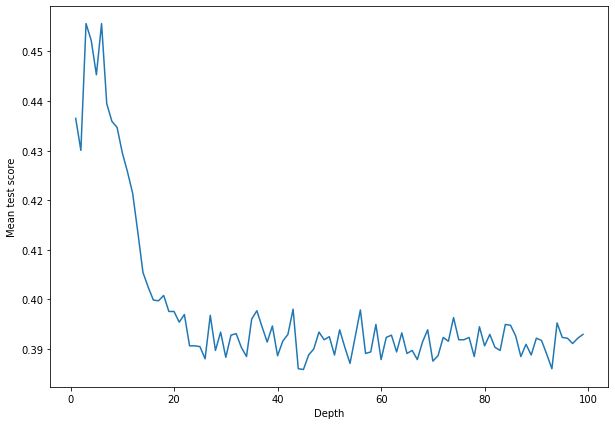

In [483]:
plt.figure(figsize=(10,7))
ax = sns.lineplot(range(min_depth, max_depth),clf.cv_results_['mean_test_score'])
ax.set_xlabel("Depth")
ax.set_ylabel("Mean test score")

In [484]:
print("Best performance with Decision Tree on wine-pca dataset = {}, with parameters = {}".format(clf.best_score_*100, clf.best_params_))

Best performance with Decision Tree on wine-pca dataset = 45.56148516610411, with parameters = {'max_depth': 3}


In [485]:
performance = {'model': 'Decision Tree', 'setting': clf.best_params_, 'dataset':'wine-pca', 'Accuracy': clf.best_score_*100}
best_accuracies = best_accuracies.append(performance, ignore_index=True)

### wine-lda

In [486]:
min_depth = 1
max_depth = 100
parameters = {'max_depth':[i for i in range(min_depth,max_depth)]}
classifier = DecisionTreeClassifier()
clf = GridSearchCV(estimator=classifier, param_grid=parameters, cv=5, verbose=1)
clf.fit(wine_lda, wineData_Y)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...]},
             verbose=1)

Text(0, 0.5, 'Mean test score')

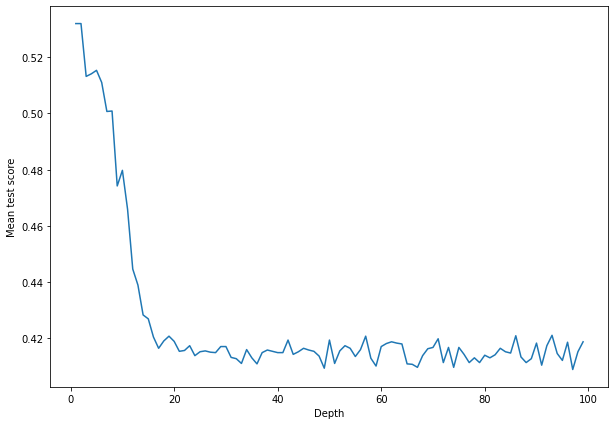

In [487]:
plt.figure(figsize=(10,7))
ax = sns.lineplot(range(1, max_depth),clf.cv_results_['mean_test_score'])
ax.set_xlabel("Depth")
ax.set_ylabel("Mean test score")

In [488]:
print("Best performance with Decision Tree on wine-lda dataset = {}, with parameters = {}".format(clf.best_score_*100, clf.best_params_))

Best performance with Decision Tree on wine-lda dataset = 53.1946467697045, with parameters = {'max_depth': 1}


In [489]:
performance = {'model': 'Decision Tree', 'setting': clf.best_params_, 'dataset':'wine-lda', 'Accuracy': clf.best_score_*100}
best_accuracies = best_accuracies.append(performance, ignore_index=True)

### wine-raw

In [490]:
min_depth = 1
max_depth = 100
parameters = {'max_depth':[i for i in range(min_depth,max_depth)]}
classifier = DecisionTreeClassifier()
clf = GridSearchCV(estimator=classifier, param_grid=parameters, cv=5, verbose=1)
clf.fit(wine_raw, wineData_Y)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...]},
             verbose=1)

Text(0, 0.5, 'Mean test score')

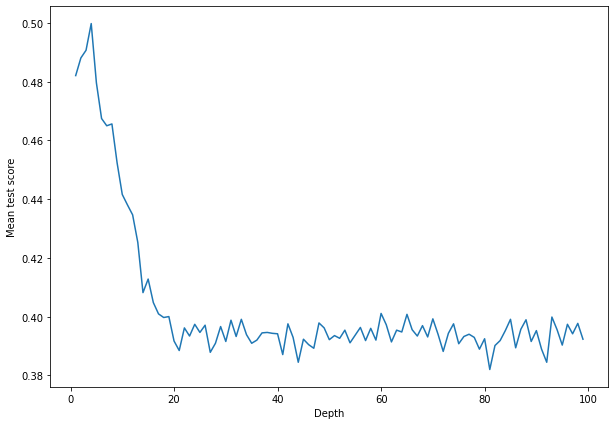

In [491]:
plt.figure(figsize=(10,7))
ax = sns.lineplot(range(min_depth, max_depth),clf.cv_results_['mean_test_score'])
ax.set_xlabel("Depth")
ax.set_ylabel("Mean test score")

In [492]:
performance = {'model': 'Decision Tree', 'setting': clf.best_params_, 'dataset':'wine-raw', 'Accuracy': clf.best_score_*100}
best_accuracies = best_accuracies.append(performance, ignore_index=True)

In [493]:
best_decision_tree = clf.best_estimator_

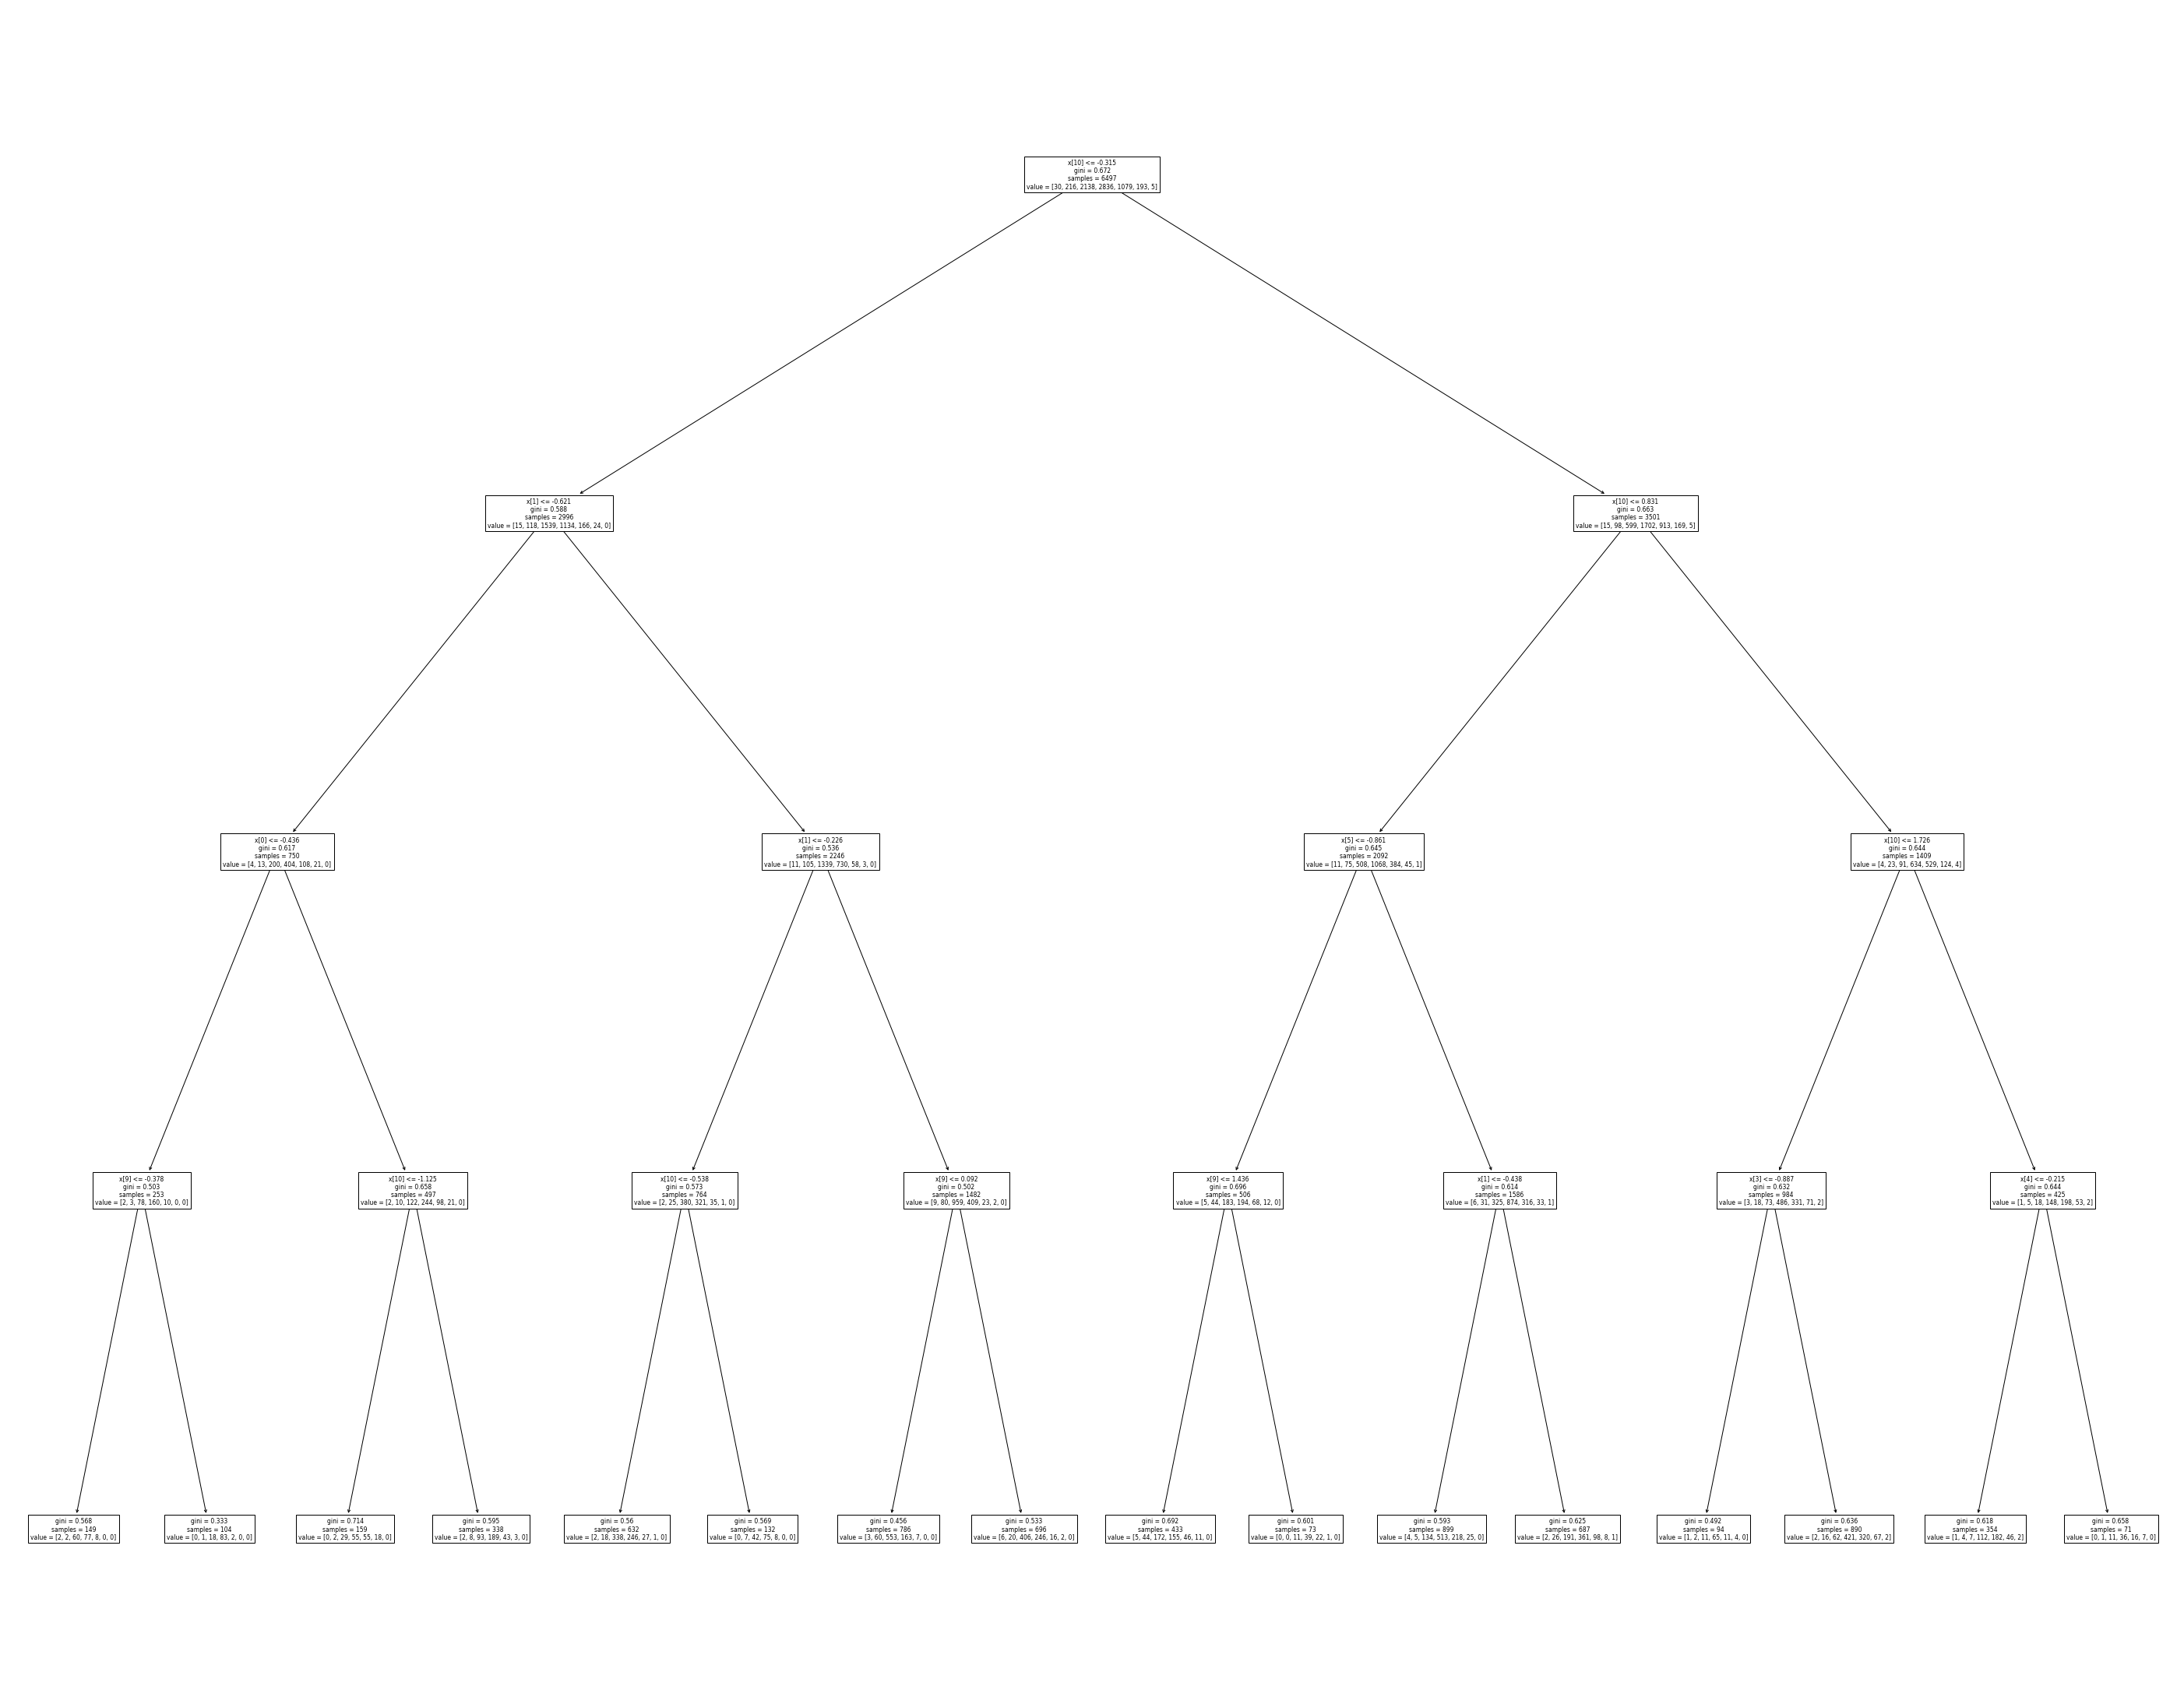

In [494]:
plt.figure(figsize=(50,40))
plot_tree(best_decision_tree)
plt.show()

In [495]:
#export_graphviz(best_decision_tree)#, out_file="tree.dot")

In [496]:
#!dot -Tpng tree.dot -o tree.png

## Random Forest

In [497]:
min_depth = 2
max_depth = 20
step_size_depth = 2
step_size_trees = 20
max_trees = 200
min_trees = 3

### wine-pca

In [498]:
parameters = {'n_estimators': [i for i in range(min_trees, max_trees, step_size_trees)], 'max_depth':[i for i in range(min_depth,max_depth,step_size_depth)]}
classifier = RandomForestClassifier(n_jobs=-1)
clf = GridSearchCV(estimator=classifier, param_grid=parameters, cv=5, n_jobs=-1, verbose=1)
clf.fit(wine_pca, wineData_Y)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'n_estimators': [3, 23, 43, 63, 83, 103, 123, 143, 163,
                                          183]},
             verbose=1)

In [499]:
rf_pca_mean_fit_time = clf.cv_results_['mean_fit_time']
rf_pca_mean_score_time= clf.cv_results_['mean_score_time']

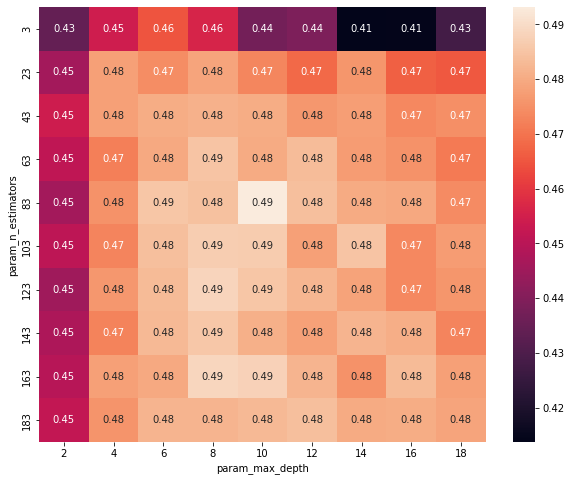

In [500]:
rf_pca_pvt = pd.pivot_table(pd.DataFrame(clf.cv_results_),
values='mean_test_score', index='param_n_estimators', columns='param_max_depth')
plt.figure(figsize=(10, 8))
sns.heatmap(rf_pca_pvt, annot = True)
plt.show()

In [501]:
print("Best performance with Random Forest on wine-pca dataset = {}, with parameters = {}".format(clf.best_score_*100, clf.best_params_))

Best performance with Random Forest on wine-pca dataset = 49.317155208148286, with parameters = {'max_depth': 10, 'n_estimators': 83}


In [502]:
performance = {'model': 'Random Forest', 'setting': clf.best_params_, 'dataset':'wine-pca', 'Accuracy': clf.best_score_*100}
best_accuracies = best_accuracies.append(performance, ignore_index=True)

### wine-lda

In [503]:
parameters = {'n_estimators': [i for i in range(min_trees, max_trees, step_size_trees)], 'max_depth':[i for i in range(min_depth,max_depth,step_size_depth)]}
classifier = RandomForestClassifier(n_jobs=-1)
clf = GridSearchCV(estimator=classifier, param_grid=parameters, cv=5, n_jobs=-1, verbose=1)
clf.fit(wine_lda, wineData_Y)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'n_estimators': [3, 23, 43, 63, 83, 103, 123, 143, 163,
                                          183]},
             verbose=1)

In [504]:
rf_lda_mean_fit_time = clf.cv_results_['mean_fit_time']
rf_lda_mean_score_time= clf.cv_results_['mean_score_time']

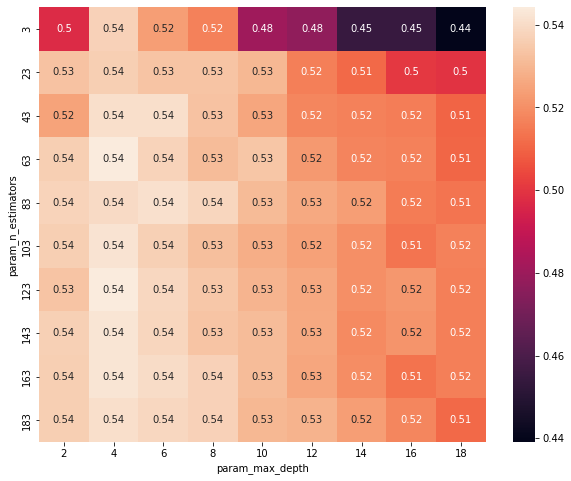

In [505]:
rf_lda_pvt = pd.pivot_table(pd.DataFrame(clf.cv_results_),
    values='mean_test_score', index='param_n_estimators', columns='param_max_depth')
plt.figure(figsize=(10, 8))
sns.heatmap(rf_lda_pvt, annot = True)
plt.show()

In [506]:
print("Best performance with Random Forest on wine-lda dataset = {}, with parameters = {}".format(clf.best_score_*100, clf.best_params_))

Best performance with Random Forest on wine-lda dataset = 54.4261502931249, with parameters = {'max_depth': 4, 'n_estimators': 123}


In [507]:
performance = {'model': 'Random Forest', 'setting': clf.best_params_, 'dataset':'wine-lda', 'Accuracy': clf.best_score_*100}
best_accuracies = best_accuracies.append(performance, ignore_index=True)

### wine-raw

In [508]:
parameters = {'n_estimators': [i for i in range(min_trees, max_trees, step_size_trees)], 'max_depth':[i for i in range(min_depth,max_depth,step_size_depth)]}
classifier = RandomForestClassifier(n_jobs=-1)
clf = GridSearchCV(estimator=classifier, param_grid=parameters, cv=5, n_jobs=-1, verbose=1)
clf.fit(wine_raw, wineData_Y)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'n_estimators': [3, 23, 43, 63, 83, 103, 123, 143, 163,
                                          183]},
             verbose=1)

In [509]:
rf_raw_mean_fit_time = clf.cv_results_['mean_fit_time']
rf_raw_mean_score_time= clf.cv_results_['mean_score_time']

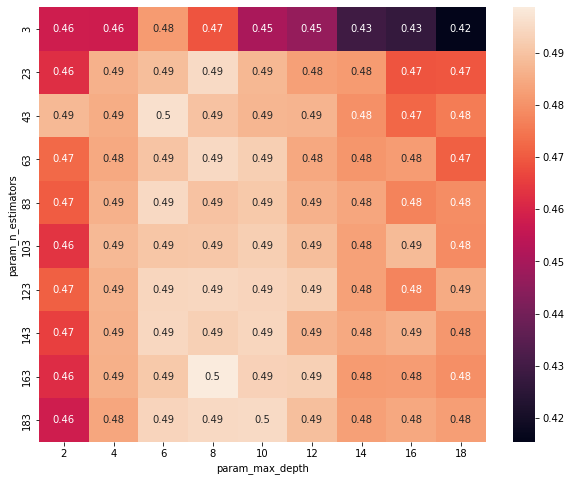

In [510]:
rf_raw_pvt = pd.pivot_table(pd.DataFrame(clf.cv_results_),
values='mean_test_score', index='param_n_estimators', columns='param_max_depth')
plt.figure(figsize=(10, 8))
sns.heatmap(rf_raw_pvt, annot = True)
plt.show()

In [511]:
print("Best performance with Random Forest on wine-raw dataset = {}, with parameters = {}".format(clf.best_score_*100, clf.best_params_))

Best performance with Random Forest on wine-raw dataset = 49.87146325575886, with parameters = {'max_depth': 8, 'n_estimators': 163}


In [512]:
performance = {'model': 'Random Forest', 'setting': clf.best_params_, 'dataset':'wine-raw', 'Accuracy': clf.best_score_*100}
best_accuracies = best_accuracies.append(performance, ignore_index=True)

## Gradient Tree Boosting

### wine-pca

In [ ]:
parameters = {'n_estimators': [60, 100, 150], 'max_depth':[6, 8 , 10]}
classifier = GradientBoostingClassifier()
clf = GridSearchCV(estimator=classifier, param_grid=parameters, cv=5, n_jobs=-1, verbose=3)
clf.fit(wine_pca, wineData_Y)

In [ ]:
gtb_pca_mean_fit_time = clf.cv_results_['mean_fit_time']
gtb_pca_mean_score_time= clf.cv_results_['mean_score_time']
gtb_pca_pvt = pd.pivot_table(pd.DataFrame(clf.cv_results_),
values='mean_test_score', index='param_n_estimators', columns='param_max_depth')
plt.figure(figsize=(8, 6))
sns.heatmap(gtb_pca_pvt, annot = True)
plt.show()

In [ ]:
print("Best performance with Gradient Tree Boosting on wine-pca dataset = {}, with parameters = {}".format(clf.best_score_*100, clf.best_params_))

In [ ]:
performance = {'model': 'Gradient Tree Boosting', 'setting': clf.best_params_, 'dataset':'wine-pca', 'Accuracy': clf.best_score_*100}
best_accuracies = best_accuracies.append(performance, ignore_index=True)

### wine-lda

In [ ]:
parameters = {'n_estimators': [60, 100, 150], 'max_depth':[6, 8 , 10]}
classifier = GradientBoostingClassifier()
clf = GridSearchCV(estimator=classifier, param_grid=parameters, cv=5, n_jobs=-1, verbose=2)
clf.fit(wine_lda, wineData_Y)

In [ ]:
gtb_lda_mean_fit_time = clf.cv_results_['mean_fit_time']
gtb_lda_mean_score_time= clf.cv_results_['mean_score_time']
gtb_lda_pvt = pd.pivot_table(pd.DataFrame(clf.cv_results_),
    values='mean_test_score', index='param_n_estimators', columns='param_max_depth')
plt.figure(figsize=(8, 6))
sns.heatmap(gtb_lda_pvt, annot = True)
plt.show()

In [ ]:
print("Best performance with Gradient Tree Boosting on wine-lda dataset = {}, with parameters = {}".format(clf.best_score_*100, clf.best_params_))

In [ ]:
performance = {'model': 'Gradient Tree Boosting', 'setting': clf.best_params_, 'dataset':'wine-lda', 'Accuracy': clf.best_score_*100}
best_accuracies = best_accuracies.append(performance, ignore_index=True)

### wine-raw

In [ ]:
parameters = {'n_estimators': [20, 50, 100, 150], 'max_depth':[6, 8 , 10]}
classifier = GradientBoostingClassifier()
clf = GridSearchCV(estimator=classifier, param_grid=parameters, cv=5, n_jobs=-1, verbose=3)
clf.fit(wine_raw, wineData_Y)

In [ ]:
gtb_raw_mean_fit_time = clf.cv_results_['mean_fit_time']
gtb_raw_mean_score_time= clf.cv_results_['mean_score_time']
gtb_raw_pvt = pd.pivot_table(pd.DataFrame(clf.cv_results_),
    values='mean_test_score', index='param_n_estimators', columns='param_max_depth')
plt.figure(figsize=(8, 6))
sns.heatmap(gtb_raw_pvt, annot = True)
plt.show()

In [ ]:
print("Best performance with Gradient Tree Boosting on wine-raw dataset = {}, with parameters = {}".format(clf.best_score_*100, clf.best_params_))

In [ ]:
performance = {'model': 'Gradient Tree Boosting', 'setting': clf.best_params_, 'dataset':'wine-raw', 'Accuracy': clf.best_score_*100}
best_accuracies = best_accuracies.append(performance, ignore_index=True)

## Final results tables summarizing all the final results

In [513]:
best_accuracies

,model,setting,dataset,Accuracy
0,KNN,n_neighbors = 84 (from prev assgn),wine-raw,68.307692
1,KNN,n_neighbors = 84 (from prev assgn),wine-pca,68.230769
2,KNN,n_neighbors = 84 (from prev assgn),wine-lda,68.538462
3,Naive Bayes,Gaussian,wine-raw,30.121040
4,Naive Bayes,Gaussian,wine-pca,44.991840
5,Naive Bayes,Gaussian,wine-lda,52.978717
6,Naive Bayes,Multinomial,wine-raw,41.512465
7,Naive Bayes,Multinomial,wine-pca,43.650927
8,Naive Bayes,Multinomial,wine-lda,43.650927
9,Naive Bayes,Complement,wine-raw,36.955421


## Comparing runtime with Random Forest



In [ ]:
runtime_comparison = pd.DataFrame(columns=['Dataset','Random Forest', 'Gradient Tree Boosting'])
row = {'Dataset': 'wine-raw', 'Random Forest': np.mean(rf_raw_mean_fit_time), 'Gradient Tree Boosting': np.mean(gtb_raw_mean_fit_time)}
runtime_comparison = runtime_comparison.append(row, ignore_index=True)
row = {'Dataset': 'wine-pca', 'Random Forest': np.mean(rf_pca_mean_fit_time), 'Gradient Tree Boosting': np.mean(gtb_pca_mean_fit_time)}
runtime_comparison = runtime_comparison.append(row, ignore_index=True)
row = {'Dataset': 'wine-lda', 'Random Forest': np.mean(rf_raw_mean_fit_time), 'Gradient Tree Boosting': np.mean(gtb_lda_mean_fit_time)}
runtime_comparison = runtime_comparison.append(row, ignore_index=True)

runtime_comparison